As a consultant for Olist (online solution for marketplaces),
we are commissioned to segment their client database. <br>
The goal is to establish a base for their communication campaigns. <br> 
They also require a maintenance contract based on a stability analysis of the different segments over time.

pd.show_versions() <br>
pandas version : 1.0.5 <br>
numpy version : 1.18.5 <br>
seaborn version : 0.11.2 <br>
matplotlib version : 3.2.2 <br>

This is the tryout notebook where I put to the test different clustering algorithms <br>
- : Usual loadings <br>
Part - 1 <a href='#simple'> Simple models <br>
$\;\;\;\;\;\;$ <a href='#pareto'> Pareto law <br>
$\;\;\;\;\;\;$ <a href='#abc'> ABC method <br>
$\;\;\;\;\;\;$ <a href='#hand'> RFM method <br>
$\;\;\;\;\;\;$ <a href='#Krfm'> Kmeans RFM <br>
    
Part 2 - KMeans with more parameters <br>
$\;\;\;\;\;\;$ <a href='#5means'> KMeans with 5 <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#elbo'> Elbow method </a> <br> 
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#davi'> David Bouldin method </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#silho'> Silhouette method </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#inter'> Intercluster Distance Maps </a> <br>
$\;\;\;\;\;\;$ <a href='#catmeans'> KMeans 5 with categories <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#nclus'> Best number of clusters </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pcav'> PCA vizualisation </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#cread'> Reading the cluster </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#extra'> Extra readings </a> <br>
$\;\;\;\;\;\;$ <a href='#full'> Full feature engineering with PCA <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pcafull'> Full features PCA <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pcafullnumb'> Best number of clusters <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pca15'> Kmeans_PCA 15 <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pca5'> Kmeans_PCA 7 <br>
    
Part - 3 Other Algorithmes <br>
$\;\;\;\;\;\;$ <a href='#agglo'> Agglomerative Hierarchical Clustering <br>
$\;\;\;\;\;\;$ <a href='#dbsc'> DBSCAN <br>

# Part 2 - KMeans with more parameters

<a id='full' />

## Full feature engineering with PCA

In [24]:
selected_full = ['Cus_mean_review_score', 'Number_of_orders', 'Recency', 'Number_of_articles', 'log_Spending',
                 'cool_stuff', 'pet_shop', 'home_confort', 'health_beauty', 'electronics',
                 'industry_commerce_construction', 'arts_video_audio', 'clothing_and_bags', 'auto',
                 'MUM_of_payment_a', 'delay_delivery', 'distance']

X_full = XKm_nona.copy()[selected_full]

X_fNorm = std_scale.fit_transform(X_full)

# Reloading after restart

In [264]:
X_fNorm.shape

(90927, 17)

<a id='pcafull' />

### Full features PCA

In [266]:
# We use a PCA to project the data over less dimensions --> decomposition from sklearn

n_compo = X_full.shape[1]

pca = decomposition.PCA(n_components=n_compo)
pca.fit(X_fNorm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_fNorm)

[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385 0.96784099 0.99950385 1.        ]


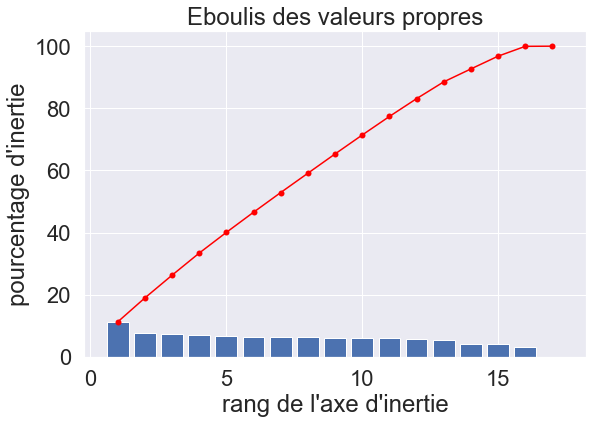

In [267]:
display_scree_plot(pca)

Dataframe, perplexity=5 in 4.2 sec
Dataframe, perplexity=30 in 5.6 sec
Dataframe, perplexity=50 in 6.9 sec
Dataframe, perplexity=100 in 10 sec


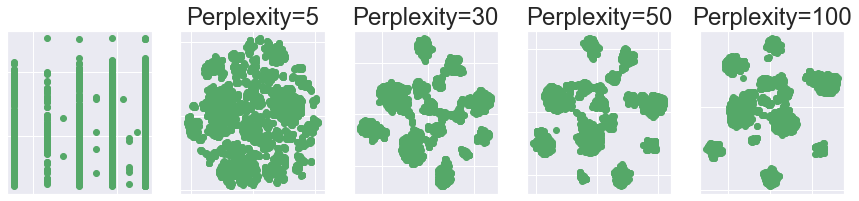

In [131]:
X_full_sample = X_full.sample(  # sample of the data (n), faster results
            n=3000,
            random_state=42)

sample_K = std_scale.fit_transform(X_full_sample)

n_components = 2
perplexities = [5, 30, 50, 100]
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 3))

#ax = subplots[1][0]
ax = subplots[0]
ax.scatter(sample_K[:, 0], sample_K[:, 2], c='g')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    #ax = subplots[1][i + 1]
    ax = subplots[i + 1]
    #ax = plt.subplots(1, i+1)

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components, init="random", random_state=0, perplexity=perplexity
    )
    Y = tsne.fit_transform(sample_K)
    t1 = time()
    print("Dataframe, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

-----------------

# PCAs

<a id='pca15' />

## Kmeans_PCA for 15 components (97%)

In [45]:
# We use a PCA to project the data over less dimensions --> decomposition from sklearn
pca = decomposition.PCA(n_components=15)
pca.fit(X_fNorm)
print(pca.explained_variance_ratio_.cumsum())
X_trans_15 = pca.transform(X_fNorm)

[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385 0.96784099]


<a id='pcafullnumb' />

#### Best number of clusters for full PCA

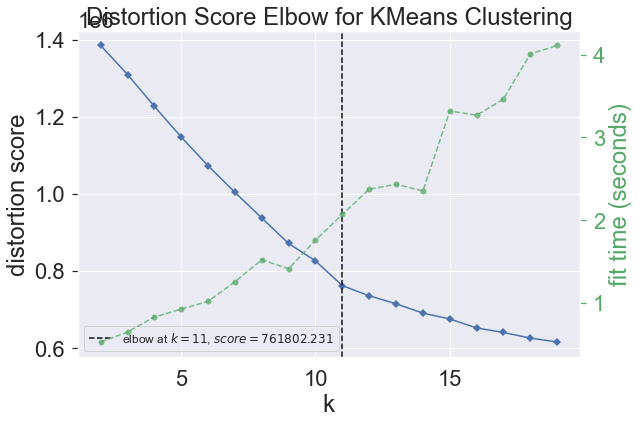

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [269]:
plt.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_trans_15)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [270]:
# Best number of clusters
startt = time.time()

silhouette_ad_p15 = []

K_range = range(5, 13)
for k in K_range:
    
    cls_ad_p15 = cluster.KMeans(n_clusters=k)
    cls_ad_p15.fit(X_trans_15)
    silh_ad_p15 = metrics.silhouette_score(X_trans_15, cls_ad_p15.labels_)
    silhouette_ad_p15.append(silh_ad_p15)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  779.1358468532562 sec


Text(0, 0.5, 'silhoutte')

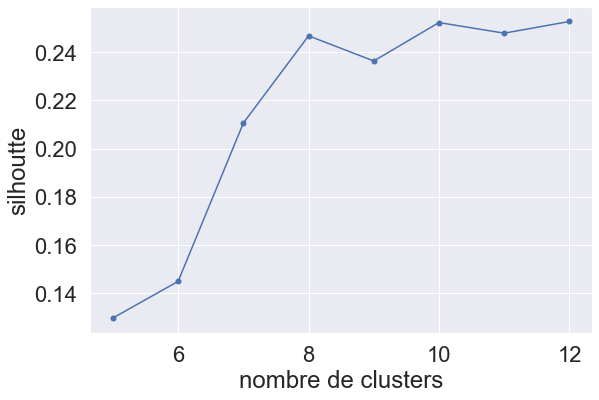

In [271]:
plt.plot(K_range, silhouette_ad_p15, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('silhoutte')

In [272]:
# Best number of clusters with davies
startt = time.time()

davies_ad_15p = []

K_range = range(3, 18)
for k in K_range:
    
    cls_ad_15p = cluster.KMeans(n_clusters=k)
    cls_ad_15p.fit(X_trans_15)
    dav_ad_15p = metrics.davies_bouldin_score(X_trans_15, cls_ad_15p.labels_)
    davies_ad_15p.append(dav_ad_15p)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  29.2036292552948 sec


Text(0, 0.5, 'davies_bouldin')

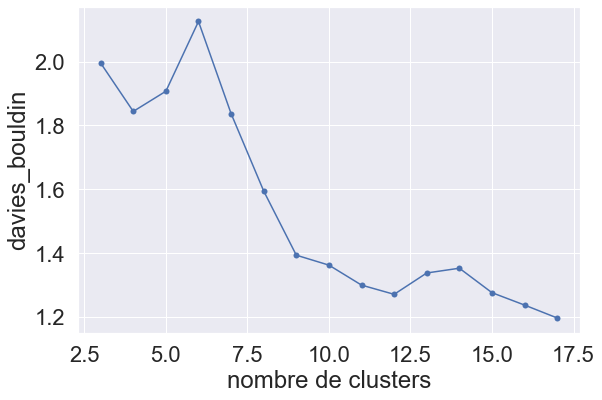

In [273]:
plt.plot(K_range, davies_ad_15p, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('davies_bouldin')

### Clusters

In [46]:
model_pl5 = KMeans(n_clusters=10)
model_pl5.fit(X_trans_15)
model_pl5.labels_

X_full['cluster_p15'] = model_pl5.labels_

In [298]:
X_full['cluster_p15'].value_counts()

7    24453
5    18586
3    13189
9     8801
0     6257
6     6004
4     5793
1     3704
2     2514
8     1626
Name: cluster_p15, dtype: int64

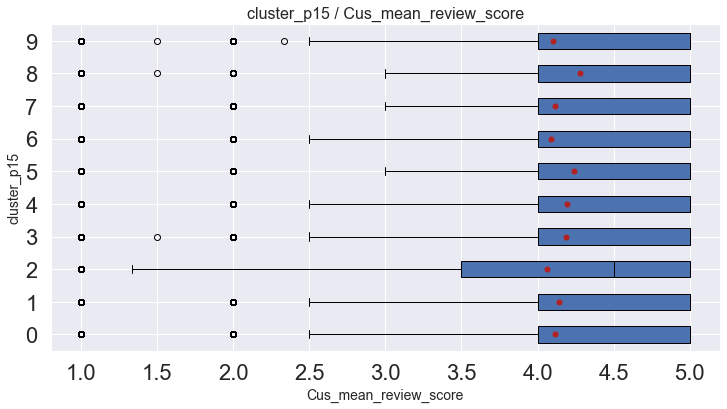

                    sum_sq       df         F        PR(>F)
C(catquali)     285.965991      9.0  19.47401  5.326244e-33
Residual     148341.129227  90917.0       NaN           NaN


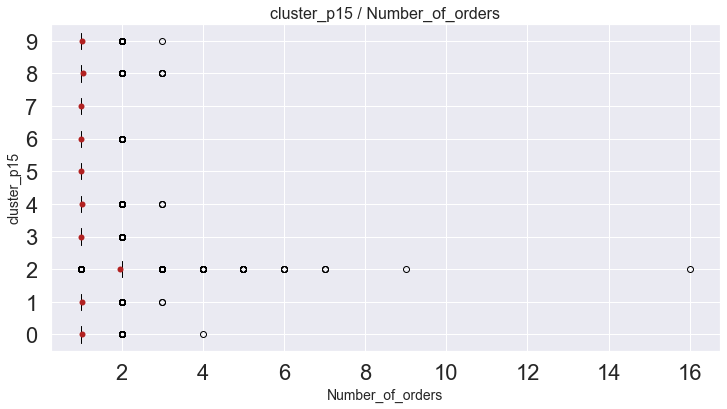

                  sum_sq       df             F  PR(>F)
C(catquali)  2206.471772      9.0  12048.332499     0.0
Residual     1850.009757  90917.0           NaN     NaN


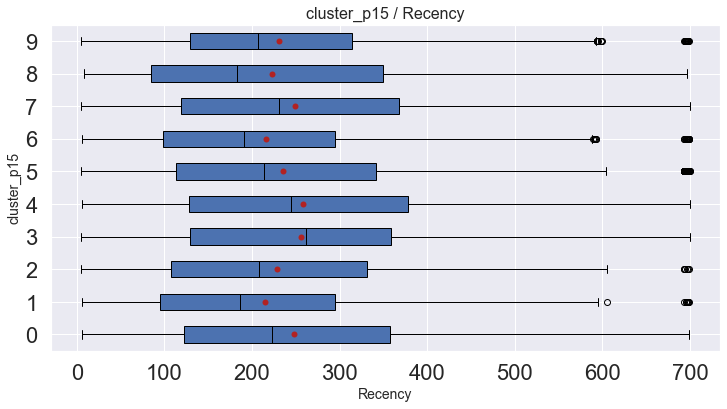

                   sum_sq       df          F         PR(>F)
C(catquali)  1.476826e+07      9.0  70.921739  3.738370e-131
Residual     2.103549e+09  90917.0        NaN            NaN


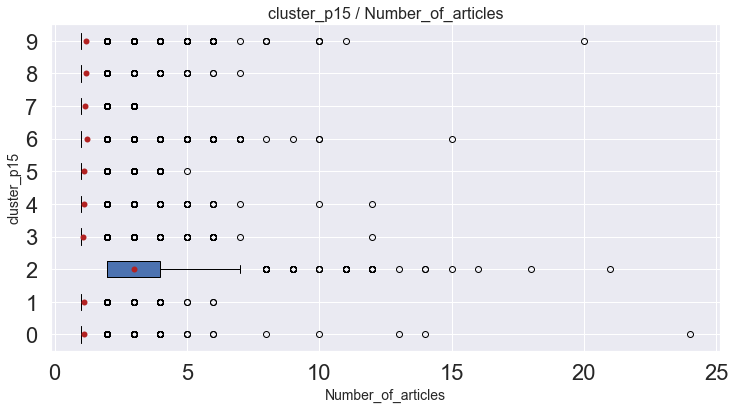

                   sum_sq       df            F  PR(>F)
C(catquali)   8845.519943      9.0  3433.856192     0.0
Residual     26022.190396  90917.0          NaN     NaN


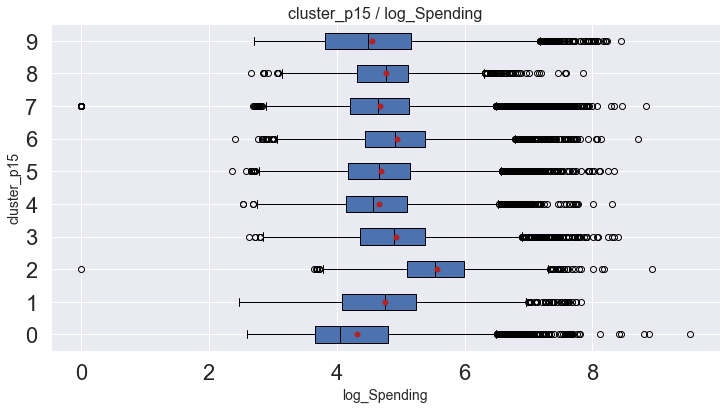

                   sum_sq       df           F  PR(>F)
C(catquali)   3936.978726      9.0  692.252667     0.0
Residual     57451.453164  90917.0         NaN     NaN


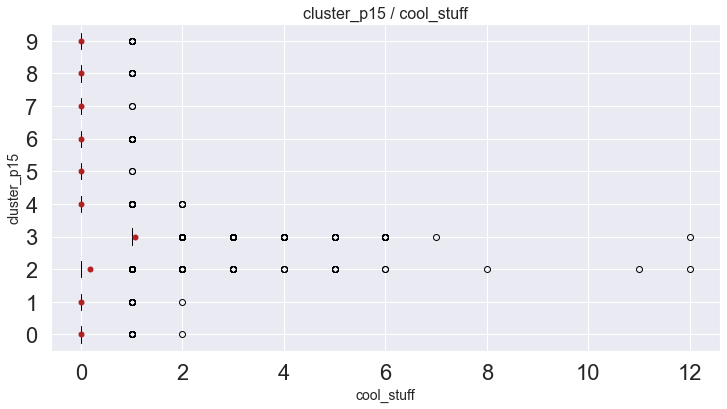

                   sum_sq       df             F  PR(>F)
C(catquali)  12762.988030      9.0  47075.025474     0.0
Residual      2738.825644  90917.0           NaN     NaN


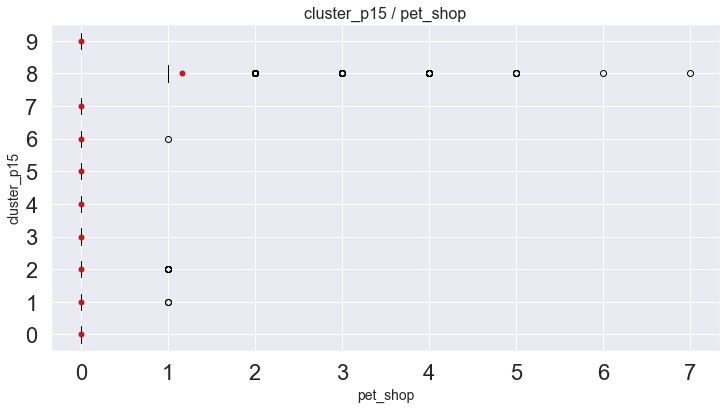

                  sum_sq       df            F  PR(>F)
C(catquali)  2134.449503      9.0  50460.17737     0.0
Residual      427.306697  90917.0          NaN     NaN


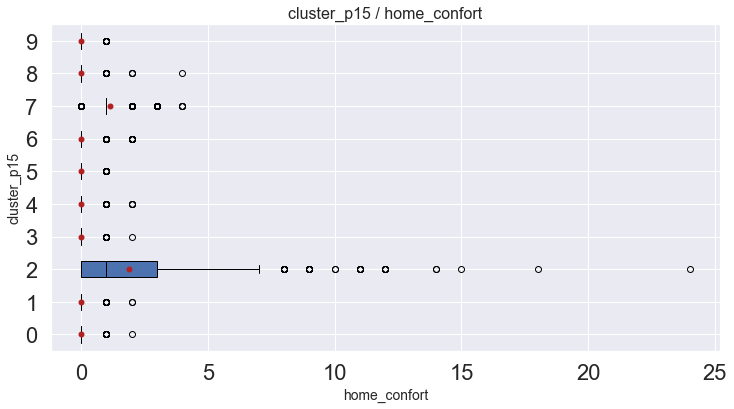

                   sum_sq       df             F  PR(>F)
C(catquali)  29264.426983      9.0  18349.099389     0.0
Residual     16111.198893  90917.0           NaN     NaN


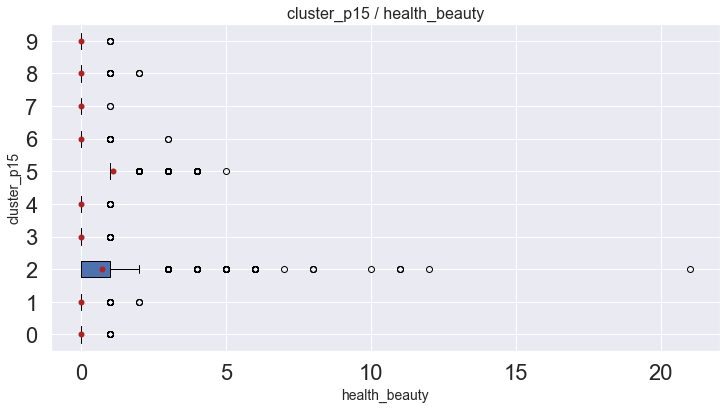

                   sum_sq       df             F  PR(>F)
C(catquali)  18154.564255      9.0  25151.809967     0.0
Residual      7291.538509  90917.0           NaN     NaN


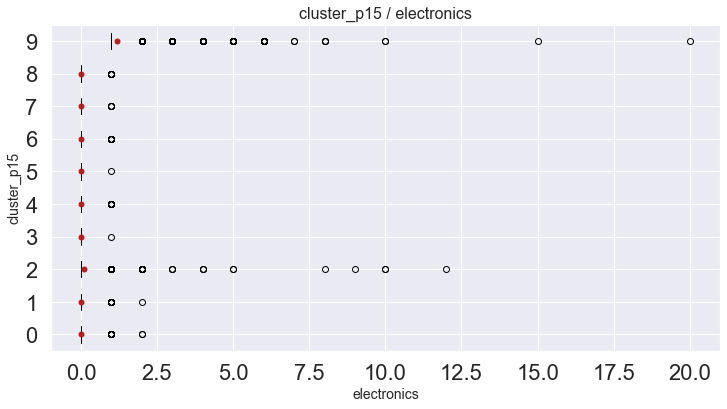

                   sum_sq       df             F  PR(>F)
C(catquali)  10870.328651      9.0  24436.760379     0.0
Residual      4493.674714  90917.0           NaN     NaN


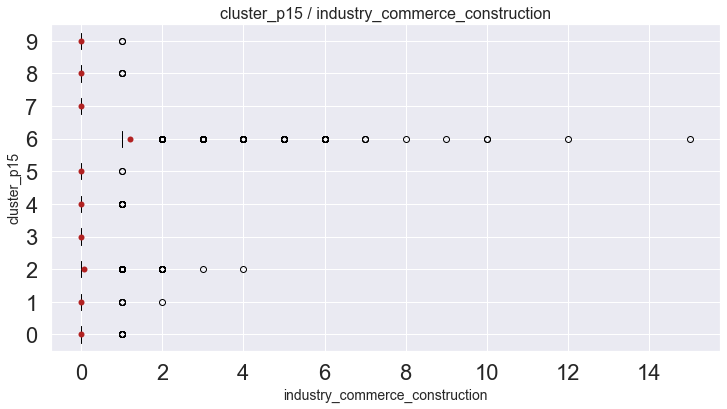

                  sum_sq       df             F  PR(>F)
C(catquali)  8068.777648      9.0  25275.835256     0.0
Residual     3224.815103  90917.0           NaN     NaN


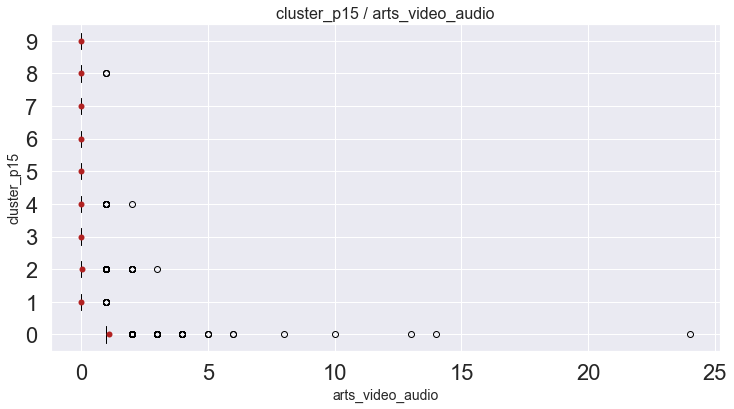

                  sum_sq       df             F  PR(>F)
C(catquali)  6921.530166      9.0  38412.209598     0.0
Residual     1820.268332  90917.0           NaN     NaN


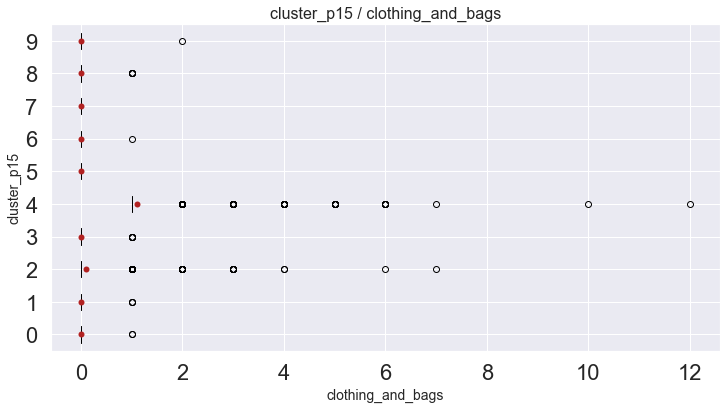

                  sum_sq       df           F  PR(>F)
C(catquali)  6540.203906      9.0  43187.5351     0.0
Residual     1529.802824  90917.0         NaN     NaN


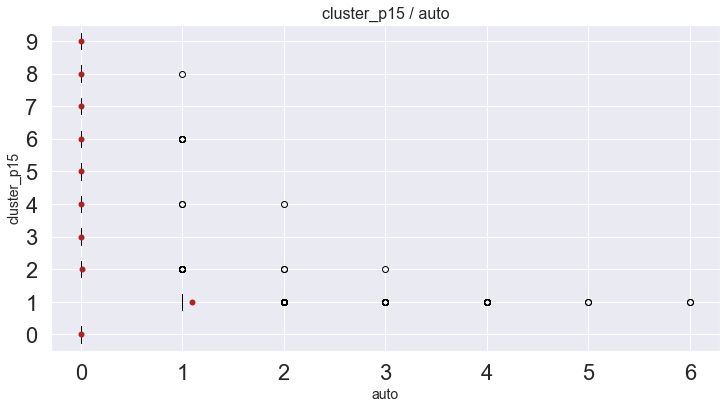

                  sum_sq       df             F  PR(>F)
C(catquali)  4268.063326      9.0  67756.135185     0.0
Residual      636.333542  90917.0           NaN     NaN


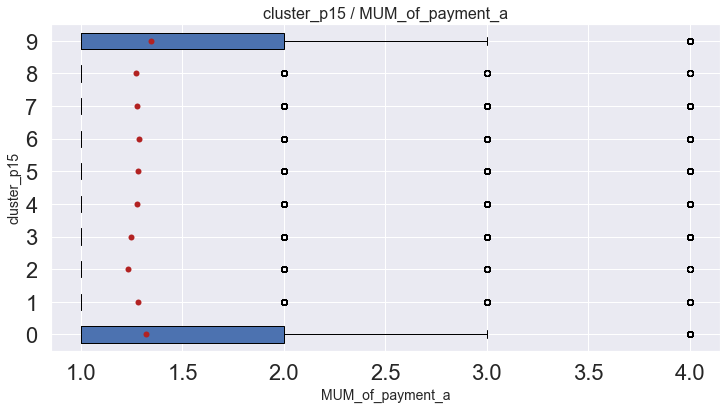

                   sum_sq       df          F        PR(>F)
C(catquali)     72.909154      9.0  24.533255  1.611236e-42
Residual     30021.298199  90917.0        NaN           NaN


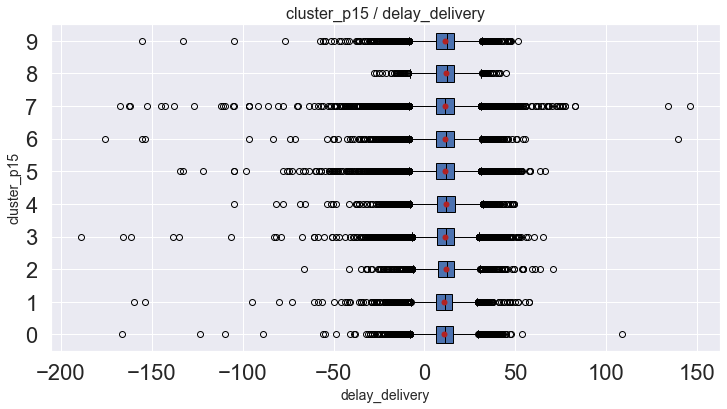

                   sum_sq       df         F        PR(>F)
C(catquali)  7.108973e+03      9.0  7.716015  1.978014e-11
Residual     9.307142e+06  90917.0       NaN           NaN


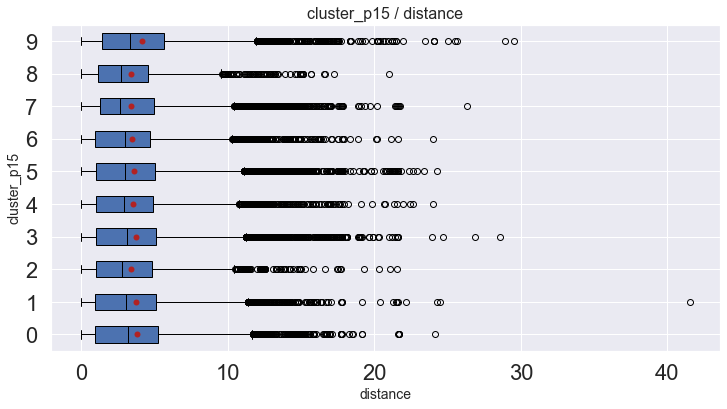

                    sum_sq       df          F        PR(>F)
C(catquali)    4149.419348      9.0  44.709386  6.517054e-81
Residual     937543.028727  90917.0        NaN           NaN


In [300]:
plotcat = list(X_full)

for i in range(17) :
    boxplots(X_full, 'cluster_p15', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

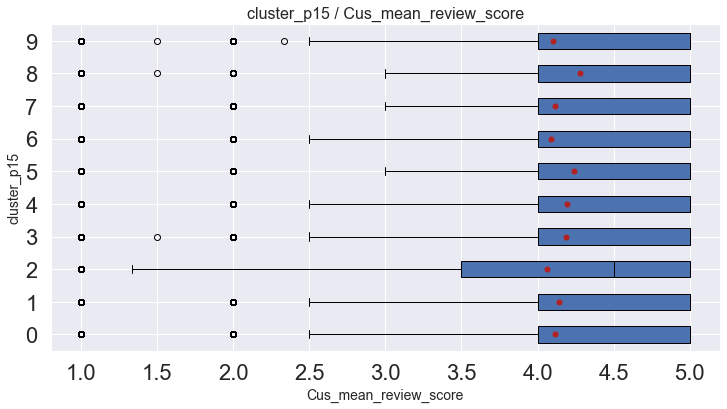

                    sum_sq       df         F        PR(>F)
C(catquali)     285.965991      9.0  19.47401  5.326244e-33
Residual     148341.129227  90917.0       NaN           NaN


In [301]:
 boxplots(X_full, 'cluster_p15', 'Cus_mean_review_score', tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

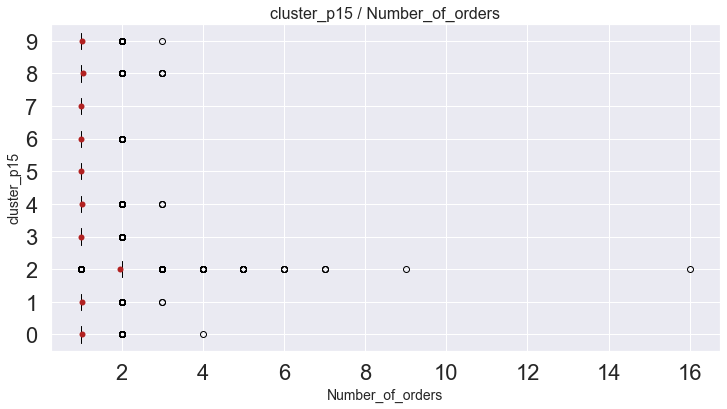

                  sum_sq       df             F  PR(>F)
C(catquali)  2206.471772      9.0  12048.332499     0.0
Residual     1850.009757  90917.0           NaN     NaN


In [302]:
 boxplots(X_full, 'cluster_p15', 'Number_of_orders', tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

In [207]:
clusters_uniq_15 = X_full['cluster_p15'].unique()
oneone = ['Cus_mean_review_score',  'Number_of_orders',  'Recency', 'Number_of_articles', 'log_Spending']
onecat = ['cool_stuff', 'pet_shop', 'home_confort', 'health_beauty', 'electronics', 'industry_commerce_construction',
          'arts_video_audio', 'clothing_and_bags', 'auto']
onemet = ['MUM_of_payment_a', 'delay_delivery', 'distance']

nb_clust = 11 # change the color scale

Cluster_p15 = []
# selected = selected categories

for i in range(len(clusters_uniq_15)) :
    means_c15 = []
    Mean_cluster15 = X_full[X_full['cluster_p15'].isin([clusters_uniq_15[i]])]
    for y in range(len(selected_full)) :
        a = Mean_cluster15[selected_full[y]]
        means_c15.append(a.mean())
    means_c15.append(i)
    Cluster_p15.append(means_c15)

col_names = selected_full.copy()
col_names.append('cluster')

df = pd.DataFrame(Cluster_p15, columns = col_names)

fig = px.parallel_coordinates(df, color='cluster', labels={"Cus_mean_review_score" : "Mean review score",
                                                           "Number_of_orders": "Number of orders",
                                                           "Recency" : "Last order in days", 
                                                           "Number_of_articles": "Total bought articles",
                                                           "log_Spending": "Total spending (log)"},
                              title = 'Mean values of the clusters',
                              dimensions = oneone,
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_scale=('red', 'blue', 'green', 'red', 'blue', 'green'),
                              #color_continuous_midpoint=2)
                              range_color = (1,nb_clust)
                             )
fig.show()

fig = px.parallel_coordinates(df, color='cluster', labels={"industry_commerce_construction" : "commerce",
                                                           "Number_of_orders": "Number of orders",
                                                           "Recency" : "Last order in days", 
                                                           "Number_of_articles": "Total bought articles",
                                                           "log_Spending": "Total spending (log)"},
                              title = 'Mean values of the clusters',
                              dimensions = onecat,
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_scale=('red', 'blue', 'green', 'red', 'blue', 'green'),
                              #color_continuous_midpoint=2)
                              range_color = (1,nb_clust)
                             )
fig.show()

fig = px.parallel_coordinates(df, color='cluster', labels={"Cus_mean_review_score" : "Mean review score",
                                                           "Number_of_orders": "Number of orders",
                                                           "Recency" : "Last order in days", 
                                                           "Number_of_articles": "Total bought articles",
                                                           "log_Spending": "Total spending (log)"},
                              title = 'Mean values of the clusters',
                              dimensions = onemet,
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_scale=('red', 'blue', 'green', 'red', 'blue', 'green'),
                              #color_continuous_midpoint=2)
                              range_color = (1,nb_clust)
                             )
fig.show()

In [47]:
polarplt(X_full, 'cluster_p15', selected_full)

-----------------

[0.11215815]


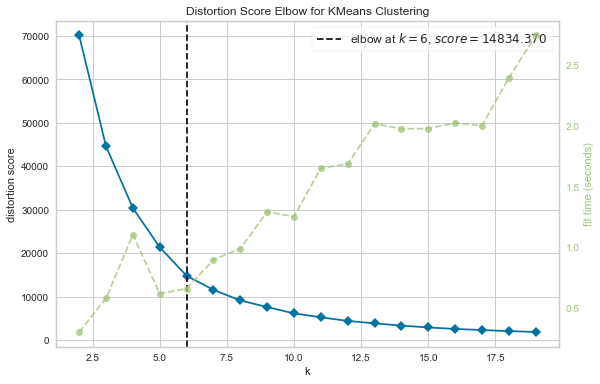

----------
[0.112177   0.18928964]


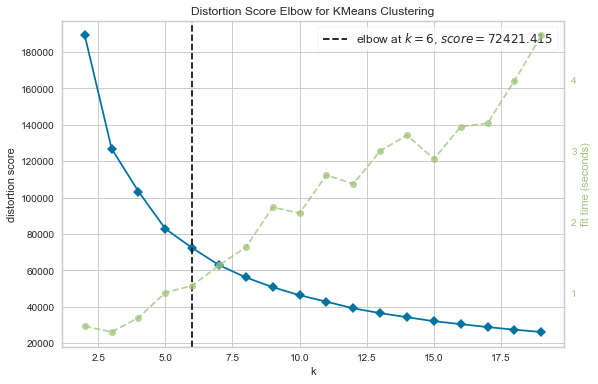

----------
[0.1121754  0.189324   0.26226531]


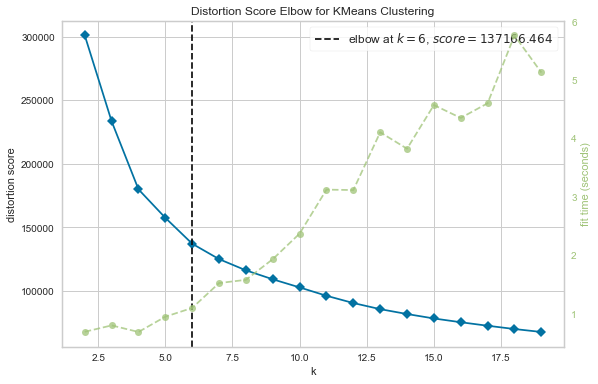

----------
[0.11213151 0.18930502 0.26241585 0.33361135]


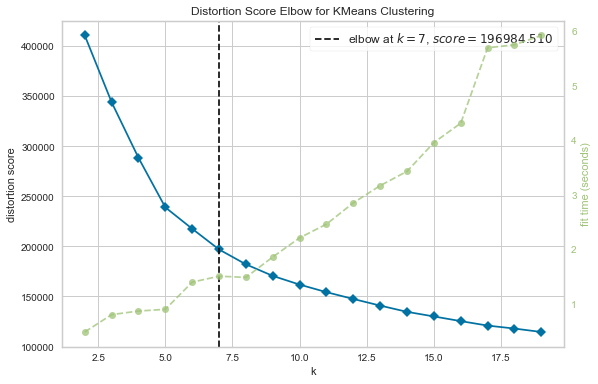

----------
[0.11217919 0.18937563 0.26245456 0.33372132 0.40043483]


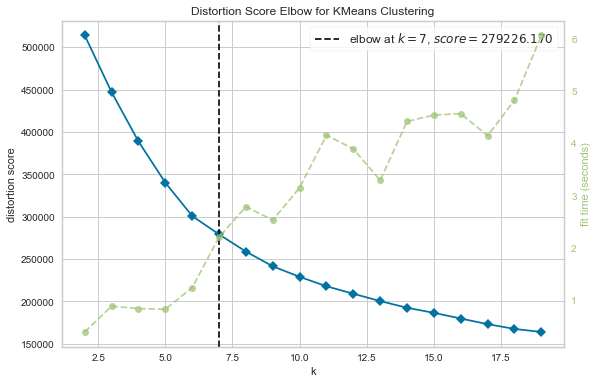

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322  ]


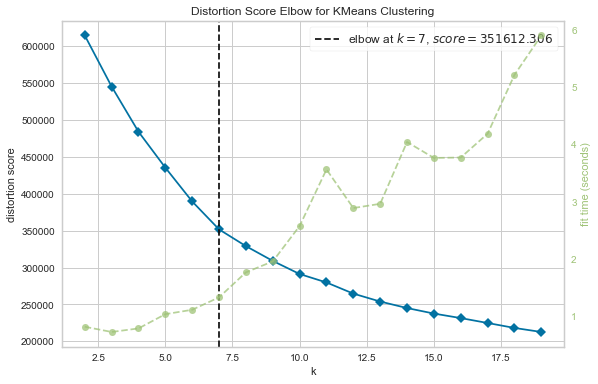

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667 ]


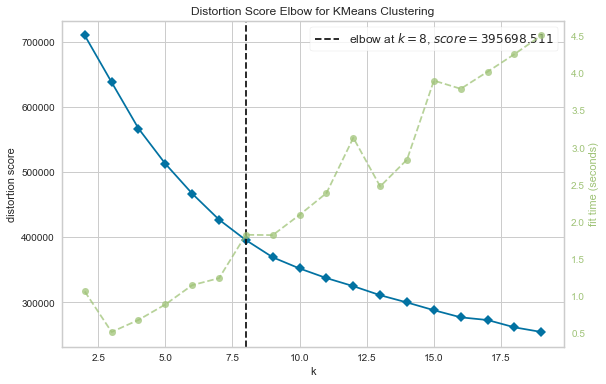

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024]


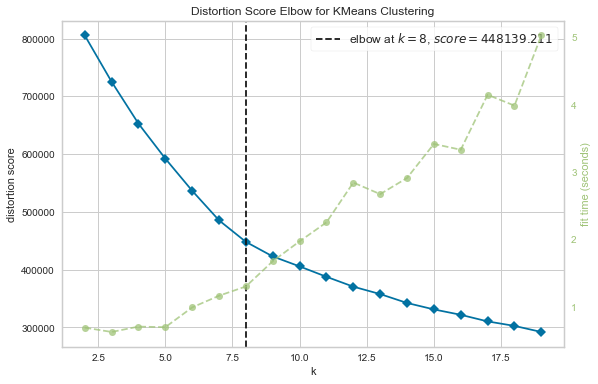

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134]


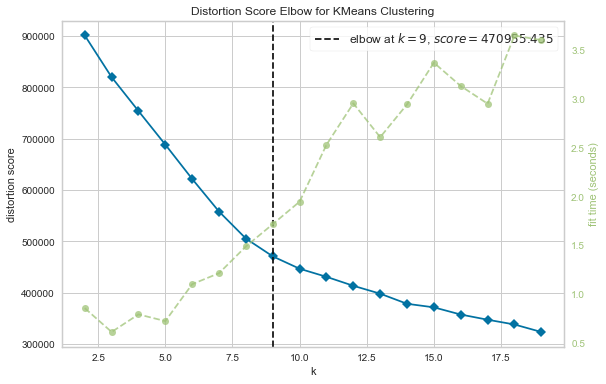

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571]


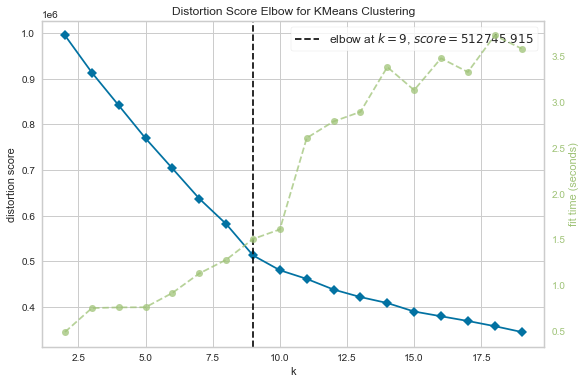

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072]


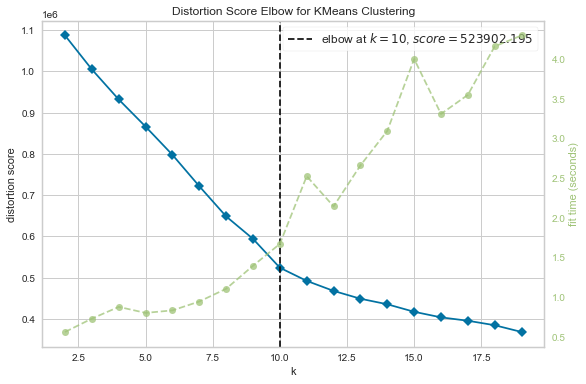

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205]


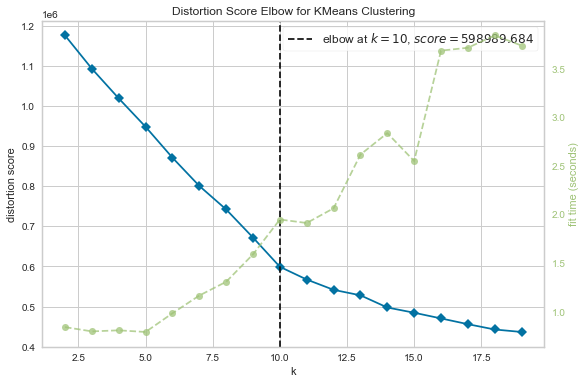

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643 ]


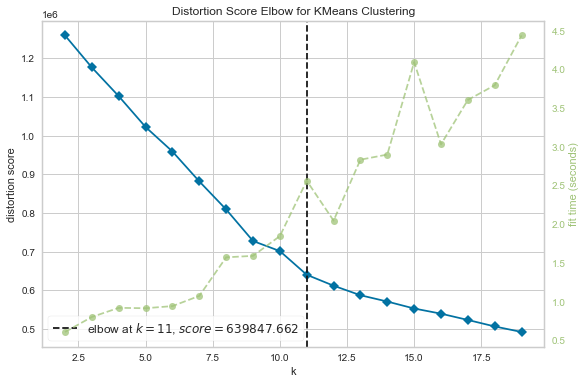

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385]


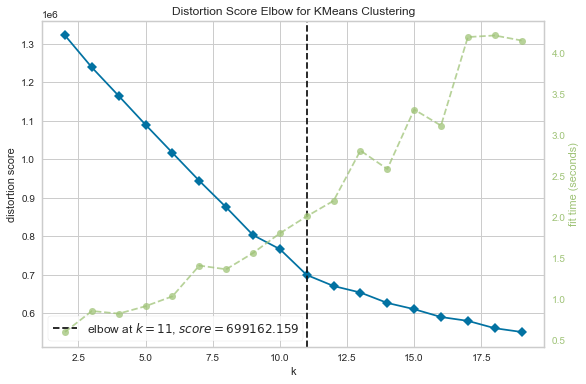

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385 0.96784099]


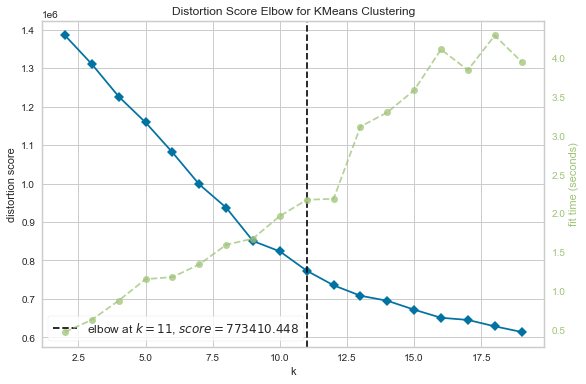

----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385 0.96784099 0.99950385]


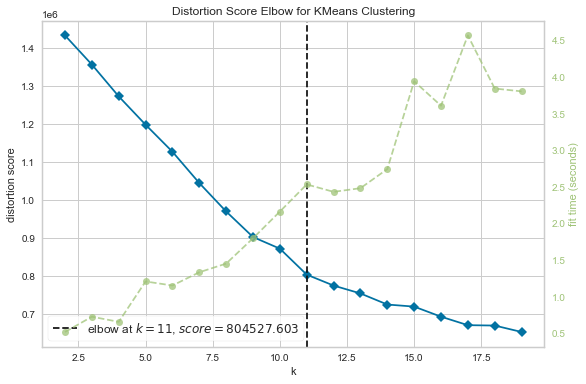

----------


In [104]:
pcas = []
X_pca = []

for i in range(1, 17) :
    
    pcas.append(decomposition.PCA(n_components=i))
    pcas[i-1].fit(X_fNorm)
    print(pcas[i-1].explained_variance_ratio_.cumsum())
    X_pca.append(pcas[i-1].transform(X_fNorm))
    
    plt.rcParams["figure.figsize"] = (9,6)

    # Instantiate the clustering model and visualizer
    modelo = KMeans()
    visualizero = KElbowVisualizer(modelo, k=(2,20))

    visualizero.fit(X_pca[i-1])    # Fit the data to the visualizer
    visualizero.poof()
    
    print('--'*5)

[0.11215815]


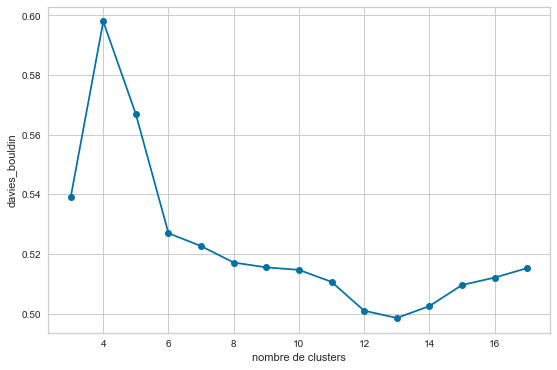

total time:  21.132209062576294 sec
----------
[0.112177   0.18928964]


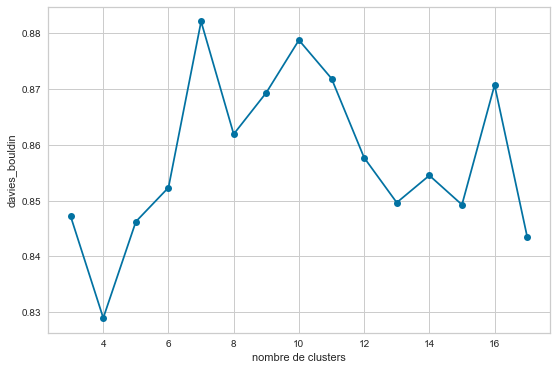

total time:  32.72474193572998 sec
----------
[0.1121754  0.189324   0.26226531]


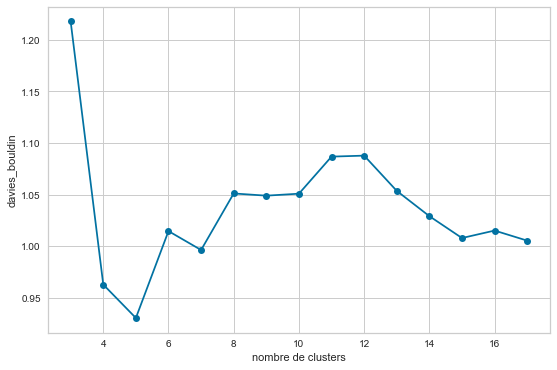

total time:  39.22688341140747 sec
----------
[0.11213151 0.18930502 0.26241585 0.33361135]


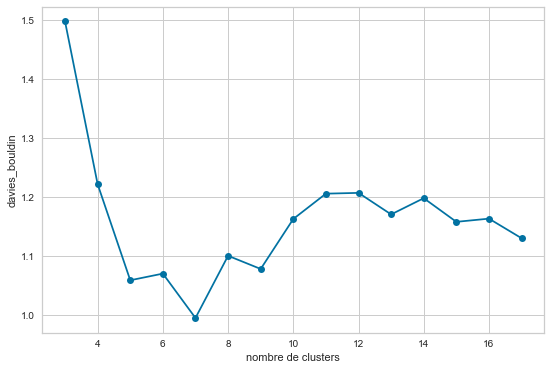

total time:  37.81463599205017 sec
----------
[0.11217919 0.18937563 0.26245456 0.33372132 0.40043483]


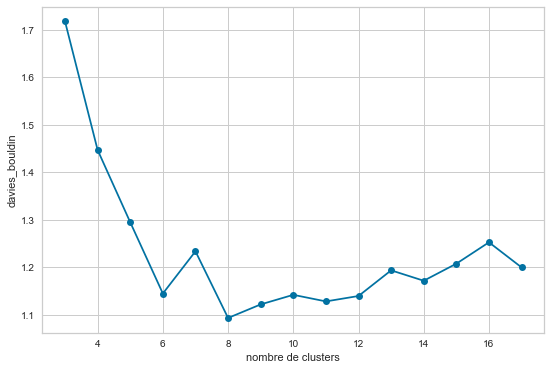

total time:  43.03355312347412 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322  ]


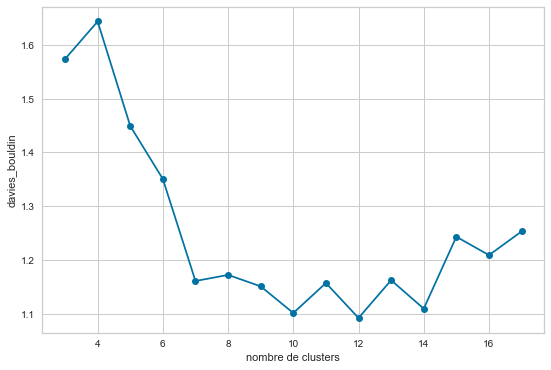

total time:  38.876323223114014 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667 ]


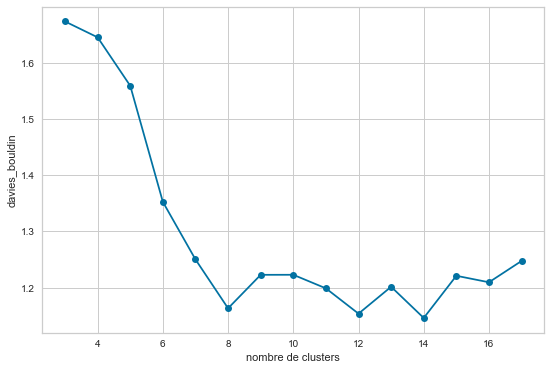

total time:  34.68208599090576 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024]


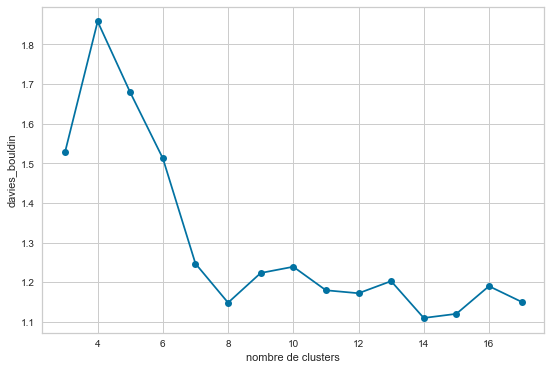

total time:  32.78525233268738 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134]


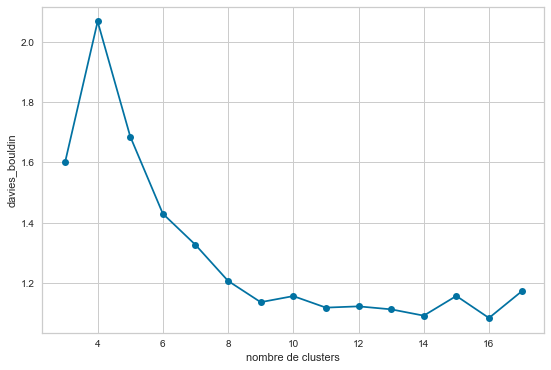

total time:  32.826759815216064 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571]


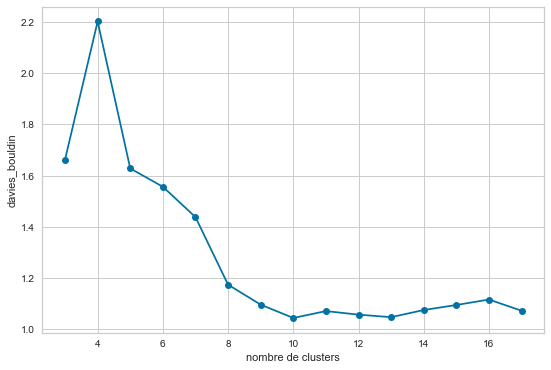

total time:  31.217978715896606 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072]


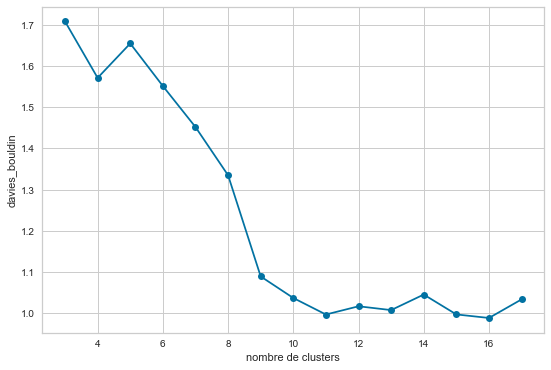

total time:  30.168293237686157 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205]


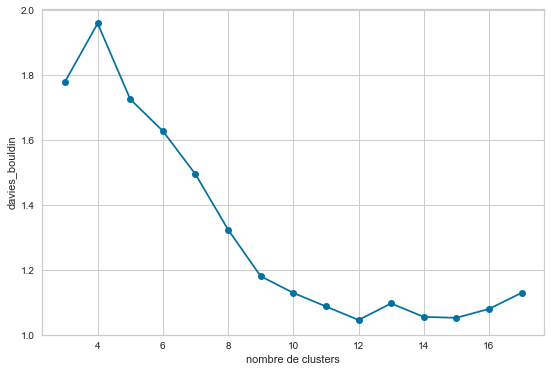

total time:  29.762221813201904 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643 ]


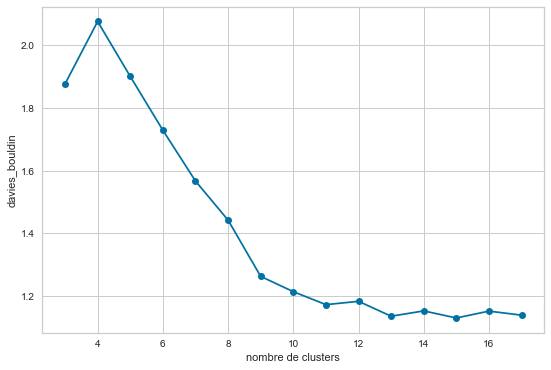

total time:  32.2566602230072 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385]


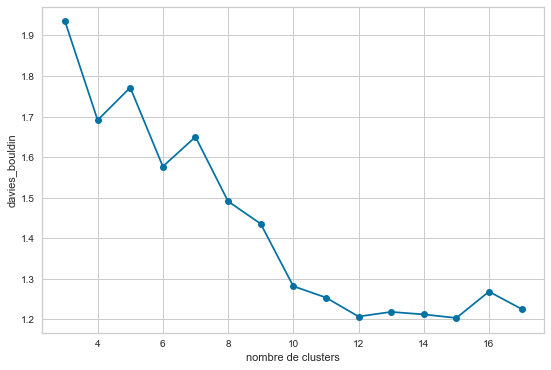

total time:  30.843912601470947 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385 0.96784099]


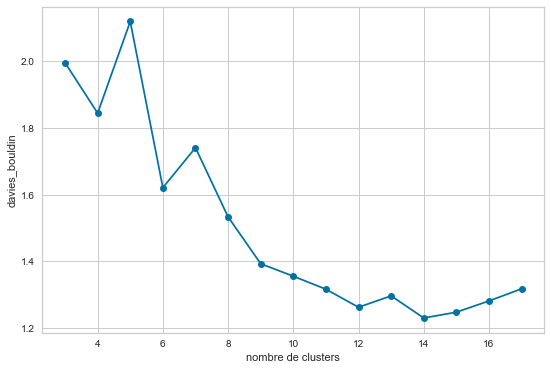

total time:  32.997289180755615 sec
----------
[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134 0.71401571 0.77370072 0.83102205
 0.8851643  0.92676385 0.96784099 0.99950385]


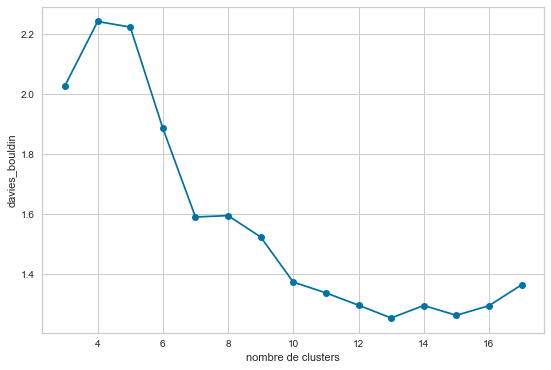

total time:  32.43969249725342 sec
----------


In [126]:
davies_ad_k = []
cls_ad = []

for i in range(1, 17) :
    
    # pcas.append(decomposition.PCA(n_components=i))
    #pcas[i-1].fit(X_fNorm)
    print(pcas[i-1].explained_variance_ratio_.cumsum())
    #X_pca.append(pcas[i-1].transform(X_fNorm))
    
    # Best number of clusters with davies
    startt = time.time()

    davies_ad = []

    K_range = range(3, 18)
    for k in K_range:
        if i == 1 :
            cls_ad.append(cluster.KMeans(n_clusters=k))
        else :
            None
        cls_ad[k-3].fit(X_pca[i-1])
        dav_ad_temp = (metrics.davies_bouldin_score(X_pca[i-1], cls_ad[k-3].labels_))
        davies_ad.append(dav_ad_temp)
        
    davies_ad_k.append(davies_ad)
        
    plt.plot(K_range, davies_ad, 'o-')
    plt.xlabel('nombre de clusters')
    plt.ylabel('davies_bouldin')
    plt.show()
    
    endt = time.time()
    print("total time: ",(endt - startt),"sec")
    
    print('--'*5)

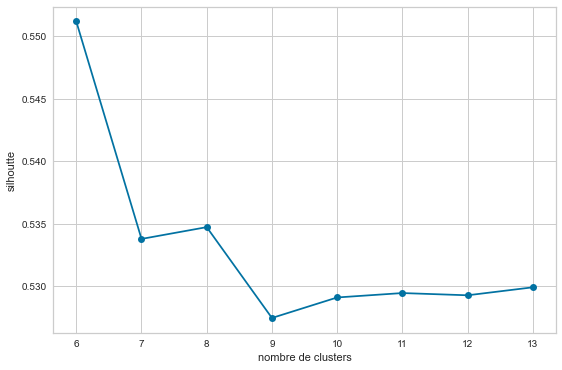

total time:  652.4855201244354 sec


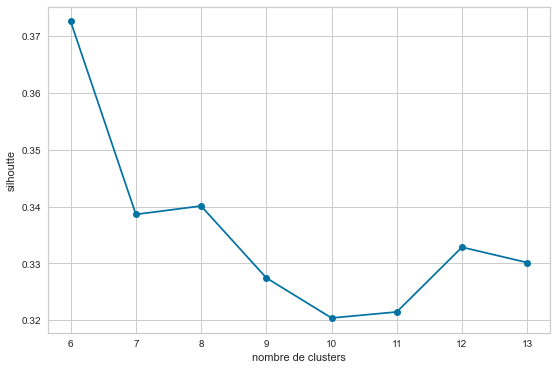

total time:  610.8024218082428 sec


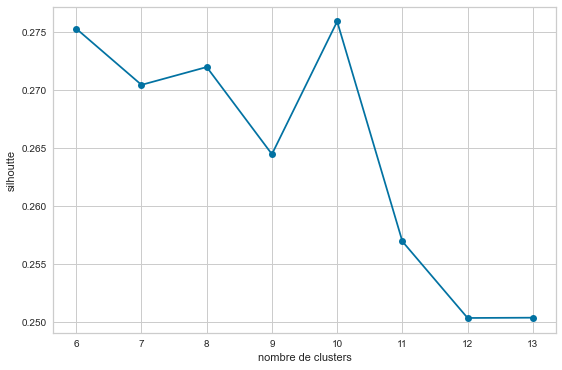

total time:  613.7605111598969 sec


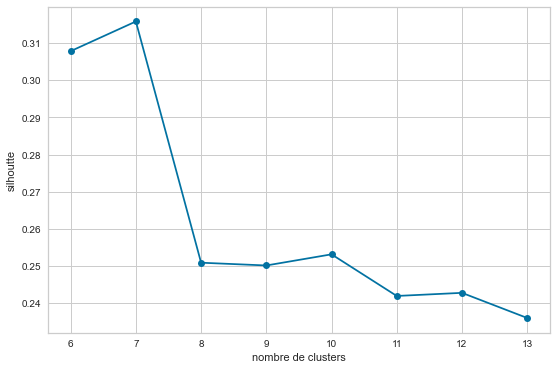

total time:  625.5184054374695 sec


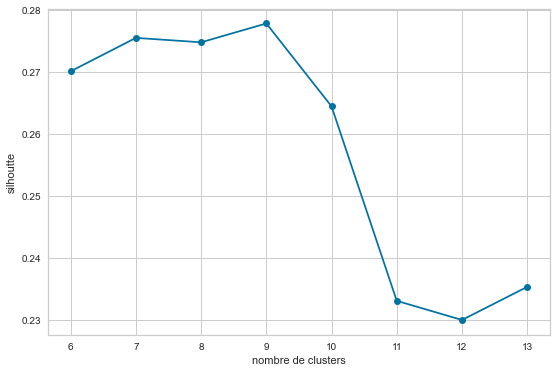

total time:  641.5010540485382 sec


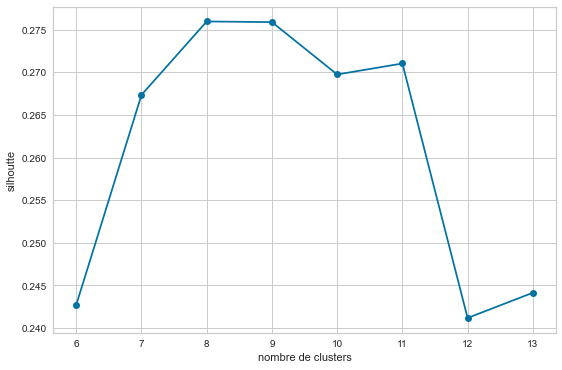

total time:  641.2569239139557 sec


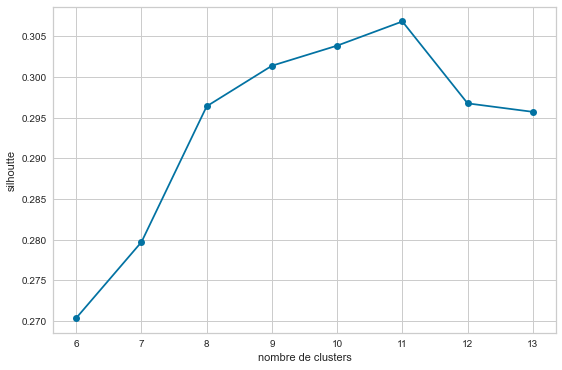

total time:  648.206526517868 sec


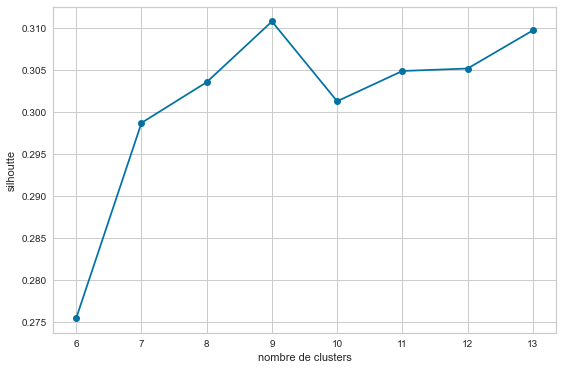

total time:  647.9117362499237 sec


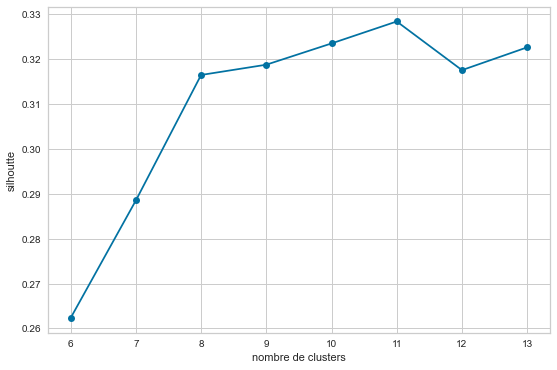

total time:  651.1694719791412 sec


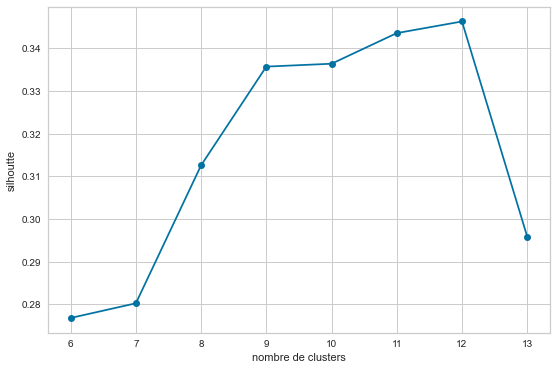

total time:  653.9676511287689 sec


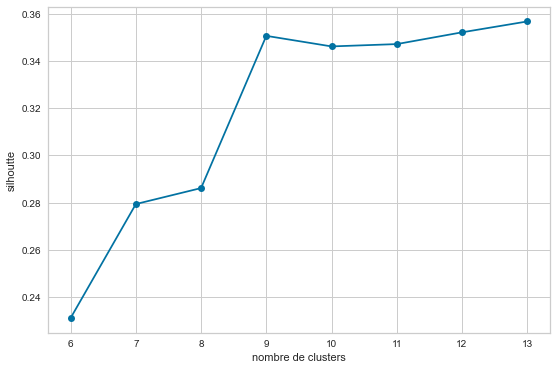

total time:  656.2410442829132 sec


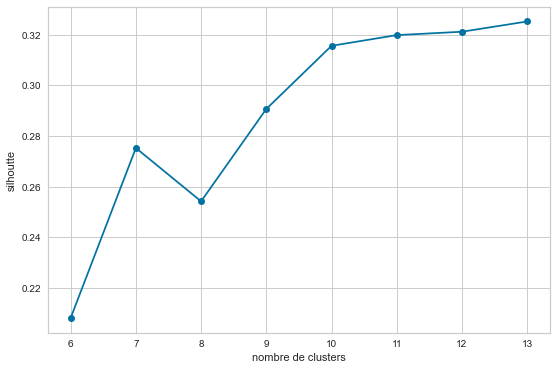

total time:  656.7045149803162 sec


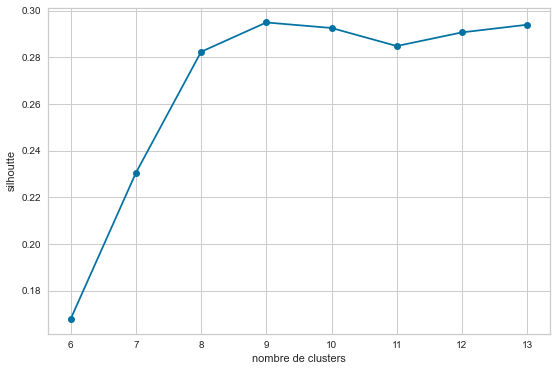

total time:  655.8790774345398 sec


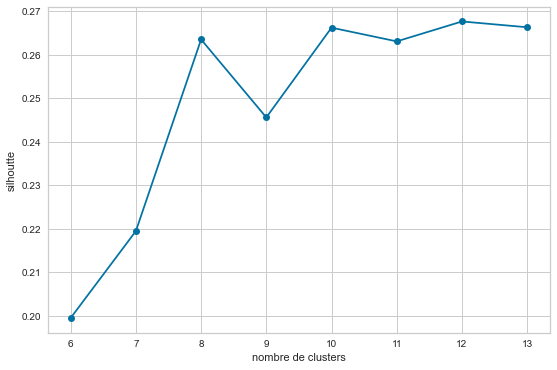

total time:  655.1757926940918 sec


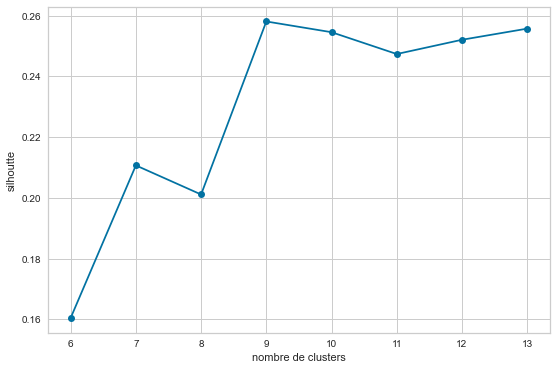

total time:  656.0485503673553 sec


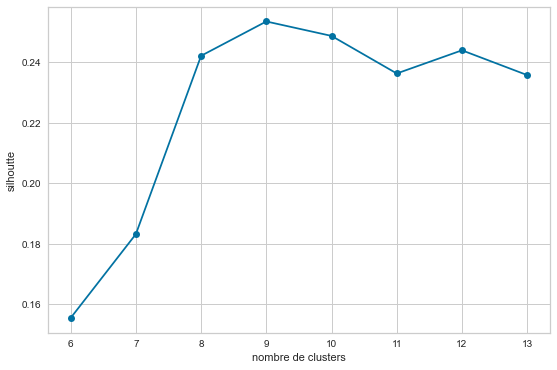

total time:  657.6617367267609 sec


In [141]:
sil_ad_pca = []
cls_ad_s = []

for i in range(1, 17) :

    startt = time.time()

    silhouette_ad_pca = []
    
    K_range = range(6, 14)
    for k in K_range:
        if i == 1 :
            cls_ad_s.append(cluster.KMeans(n_clusters=k))
        else :
            None
        cls_ad_s[k-6].fit(X_pca[i-1])
        silh_ad_temp = metrics.silhouette_score(X_pca[i-1], cls_ad_s[k-6].labels_)
        silhouette_ad_pca.append(silh_ad_temp)
    
    sil_ad_pca.append(silhouette_ad_pca)
    
    plt.plot(K_range, silhouette_ad_pca, 'o-')
    plt.xlabel('nombre de clusters')
    plt.ylabel('silhoutte')
    plt.show()
    
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [149]:
explained = [0.11217923, 0.18937626, 0.26250795, 0.33377928, 0.40049328, 0.465322, 0.5287667, 0.59095024,
             0.65299134, 0.71401571, 0.77370072, 0.83102205, 0.8851643,  0.92676385, 0.96784099, 0.99950385]
explained_10 = [i*10 for i in explained]
elbow_pca = [6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 11, 11]
daviers_pca = [6, 7, 11, 12, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6]
sil_pca = [6, 6, 10, 7, 9, 8, 11, 9, 11, 12, 13, 13, 9, 12, 9, 9]
range_pca = range(1, 17)
legend_pca = ['pca_explained', 'elbow_method', 'davies_method', 'silhoutte_method']

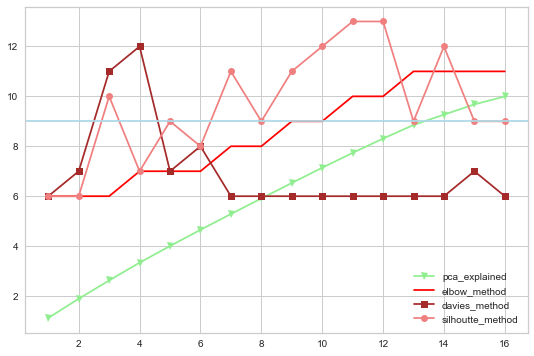

In [166]:
plt.figure(figsize=(10, 6))

plt.plot(range_pca, explained_10, marker = 'v', color='lightgreen')
plt.plot(range_pca, elbow_pca, marker = 'D', color='red')
plt.plot(range_pca, daviers_pca, marker = 'p', color='brown')
plt.plot(range_pca, sil_pca, marker = 'o', color='lightcoral')
plt.axhline(y=9, color='lightblue')

plt.legend(legend_pca)

-----------------

In [152]:
# We use a PCA to project the data over less dimensions --> decomposition from sklearn
pca8 = decomposition.PCA(n_components=8)
pca8.fit(X_fNorm)
print(pca8.explained_variance_ratio_.cumsum())
X_trans_8 = pca8.transform(X_fNorm)

[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024]


In [153]:
model_p8 = KMeans(n_clusters=8)
model_p8.fit(X_trans_8)
model_p8.labels_

X_full['cluster_p8'] = model_p8.labels_

In [154]:
X_full['cluster_p8'].value_counts()

1    21937
3    17289
0    12534
6    10929
4    10022
7     8726
5     6293
2     3197
Name: cluster_p8, dtype: int64

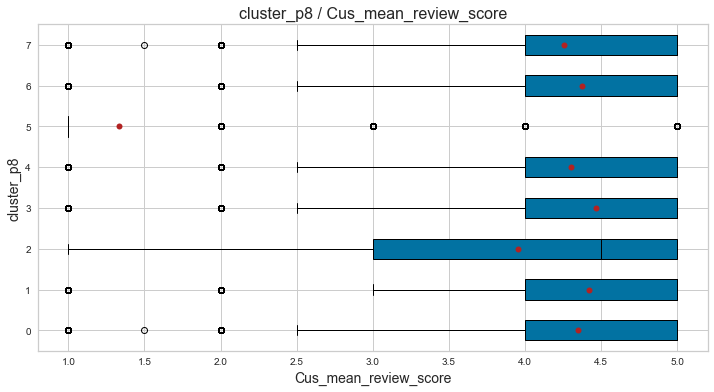

                   sum_sq       df           F  PR(>F)
C(catquali)  54692.257956      7.0  7562.33264     0.0
Residual     93934.837261  90919.0         NaN     NaN


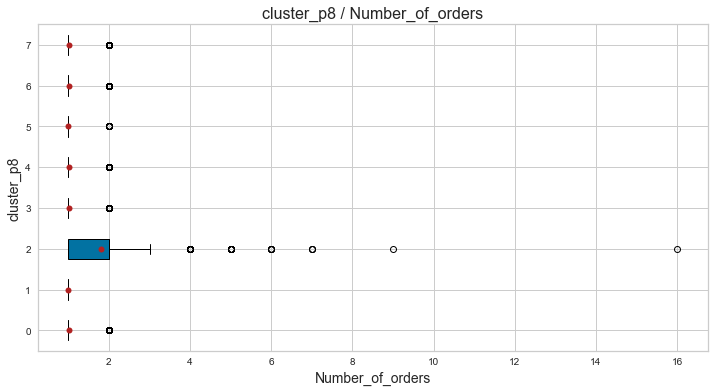

                  sum_sq       df             F  PR(>F)
C(catquali)  1962.429377      7.0  12172.033908     0.0
Residual     2094.052152  90919.0           NaN     NaN


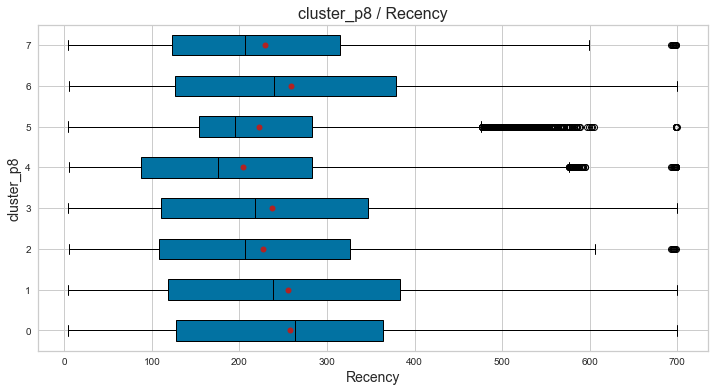

                   sum_sq       df           F         PR(>F)
C(catquali)  2.929500e+07      7.0  182.140724  3.467610e-269
Residual     2.089022e+09  90919.0         NaN            NaN


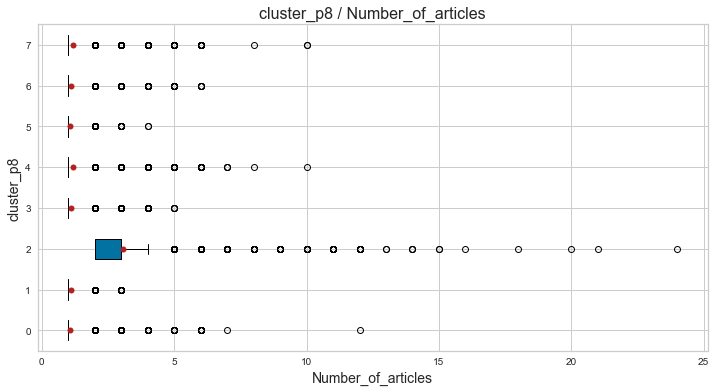

                   sum_sq       df            F  PR(>F)
C(catquali)  11852.210001      7.0  6688.604669     0.0
Residual     23015.500338  90919.0          NaN     NaN


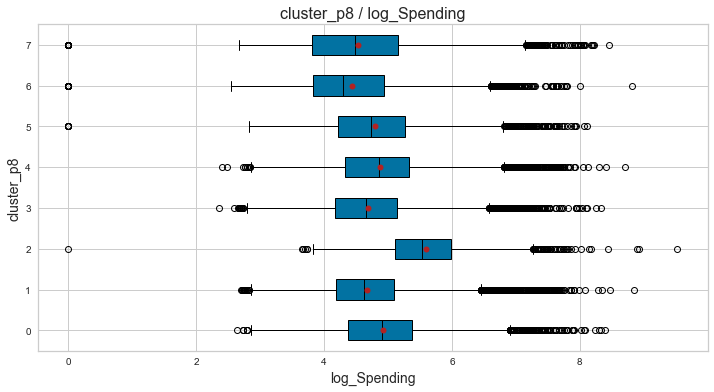

                   sum_sq       df            F  PR(>F)
C(catquali)   4487.924327      7.0  1024.438745     0.0
Residual     56900.507563  90919.0          NaN     NaN


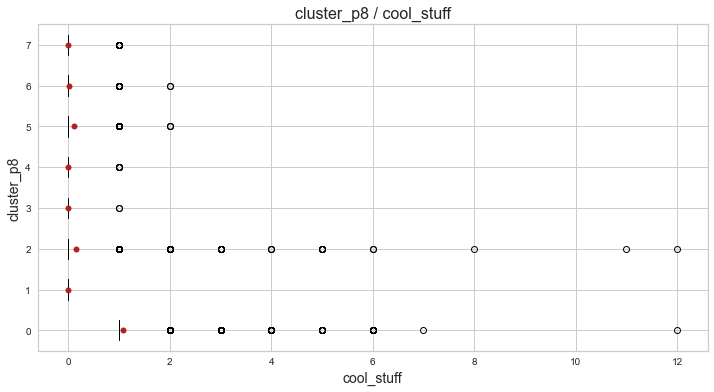

                   sum_sq       df             F  PR(>F)
C(catquali)  12192.658572      7.0  47856.165716     0.0
Residual      3309.155102  90919.0           NaN     NaN


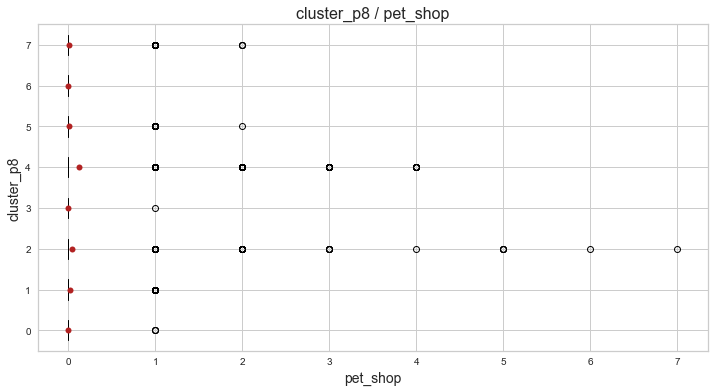

                  sum_sq       df           F  PR(>F)
C(catquali)   132.442555      7.0  708.109747     0.0
Residual     2429.313645  90919.0         NaN     NaN


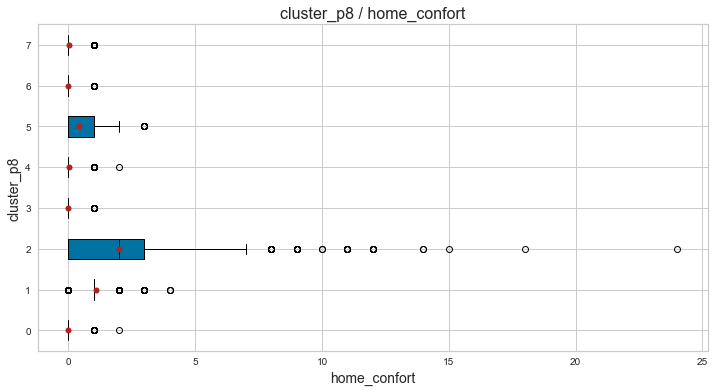

                   sum_sq       df             F  PR(>F)
C(catquali)  27806.672503      7.0  20557.000292     0.0
Residual     17568.953373  90919.0           NaN     NaN


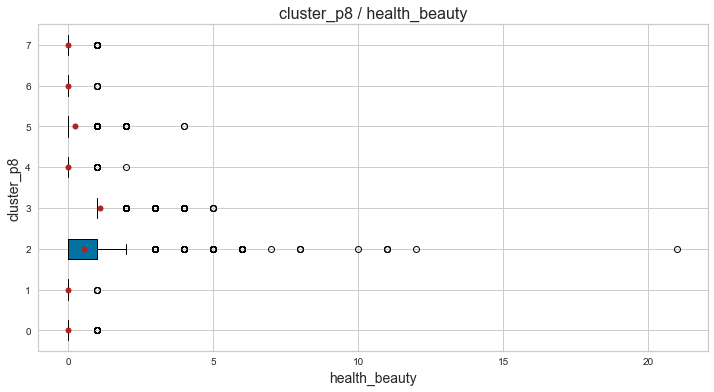

                   sum_sq       df             F  PR(>F)
C(catquali)  16906.342179      7.0  25713.462996     0.0
Residual      8539.760585  90919.0           NaN     NaN


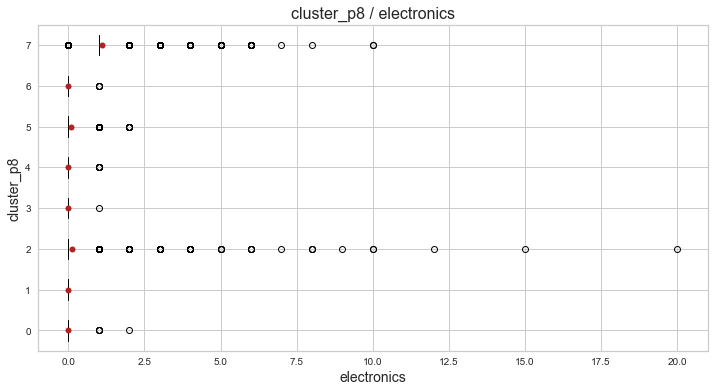

                  sum_sq       df             F  PR(>F)
C(catquali)  9776.340926      7.0  22724.942172     0.0
Residual     5587.662439  90919.0           NaN     NaN


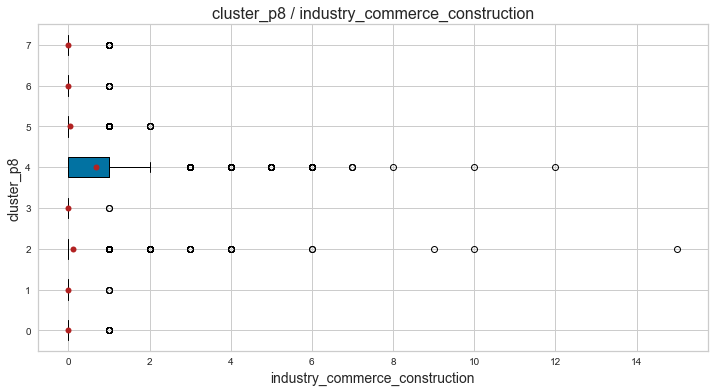

                  sum_sq       df           F  PR(>F)
C(catquali)  4033.057648      7.0  7214.76867     0.0
Residual     7260.535102  90919.0         NaN     NaN


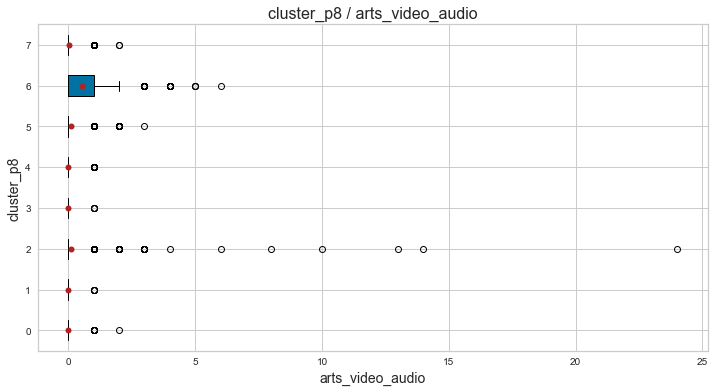

                  sum_sq       df            F  PR(>F)
C(catquali)  2705.549089      7.0  5821.633388     0.0
Residual     6036.249408  90919.0          NaN     NaN


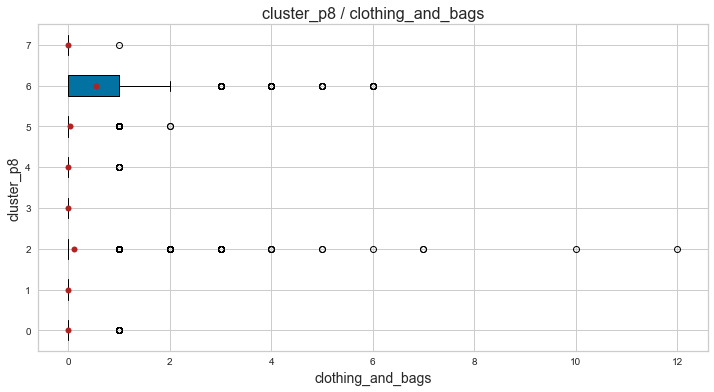

                  sum_sq       df            F  PR(>F)
C(catquali)  2847.651712      7.0  7082.345172     0.0
Residual     5222.355019  90919.0          NaN     NaN


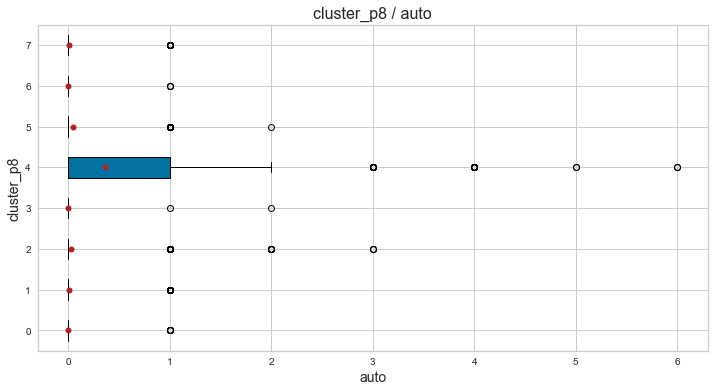

                  sum_sq       df           F  PR(>F)
C(catquali)  1134.809714      7.0  3910.08201     0.0
Residual     3769.587154  90919.0         NaN     NaN


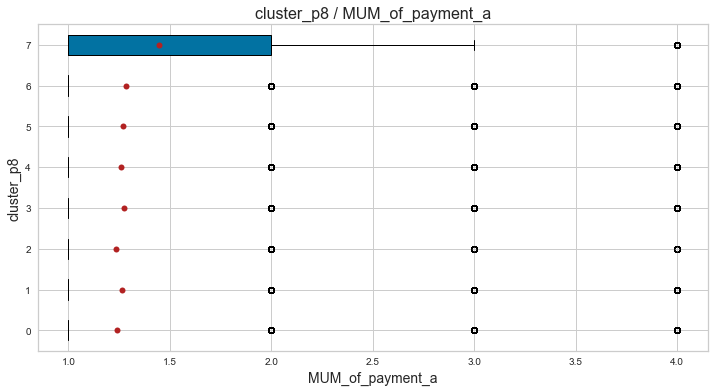

                   sum_sq       df           F         PR(>F)
C(catquali)    275.628314      7.0  120.058661  2.372146e-176
Residual     29818.579039  90919.0         NaN            NaN


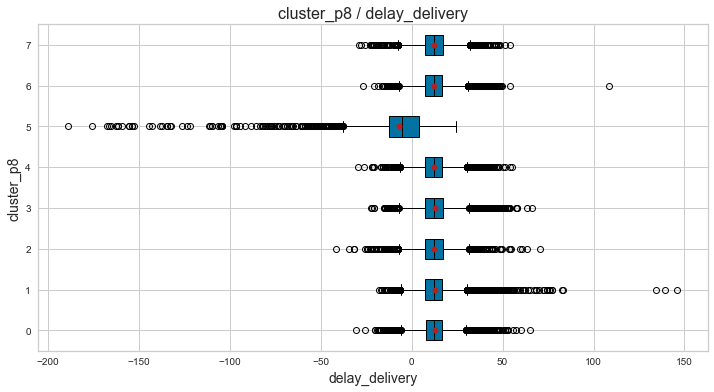

                   sum_sq       df            F  PR(>F)
C(catquali)  2.189181e+06      7.0  3990.699687     0.0
Residual     7.125071e+06  90919.0          NaN     NaN


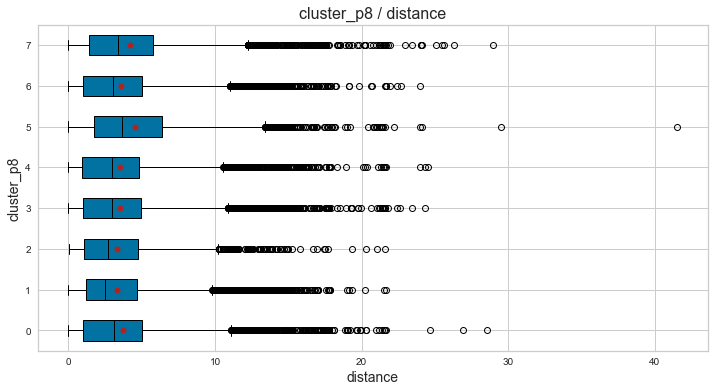

                    sum_sq       df           F         PR(>F)
C(catquali)   11754.144623      7.0  164.169889  2.430892e-242
Residual     929938.303452  90919.0         NaN            NaN


In [155]:
plotcat = list(X_full)

for i in range(17) :
    boxplots(X_full, 'cluster_p8', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

--------------

In [136]:
# We use a PCA to project the data over less dimensions --> decomposition from sklearn
pca9 = decomposition.PCA(n_components=9)
pca9.fit(X_fNorm)
print(pca9.explained_variance_ratio_.cumsum())
X_trans_9 = pca9.transform(X_fNorm)

[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667  0.59095024 0.65299134]


In [137]:
model_p9 = KMeans(n_clusters=9)
model_p9.fit(X_trans_9)
model_p9.labels_

X_full['cluster_p9'] = model_p9.labels_

In [138]:
X_full['cluster_p9'].value_counts()

5    22267
7    17656
2    12621
4     9677
8     8620
1     6195
0     5783
3     5656
6     2452
Name: cluster_p9, dtype: int64

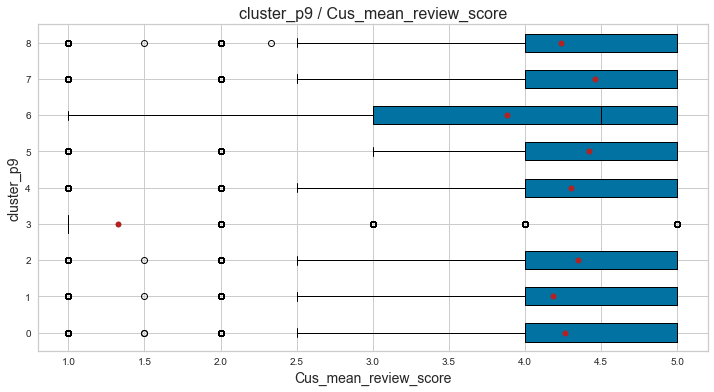

                   sum_sq       df            F  PR(>F)
C(catquali)  49522.112223      8.0  5678.891292     0.0
Residual     99104.982995  90918.0          NaN     NaN


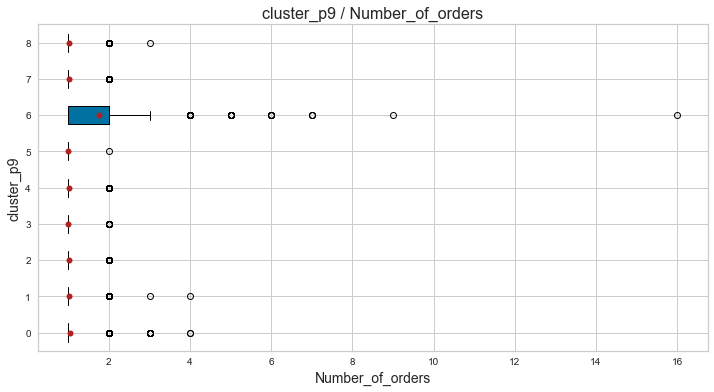

                  sum_sq       df            F  PR(>F)
C(catquali)  1297.670378      8.0  5345.671963     0.0
Residual     2758.811151  90918.0          NaN     NaN


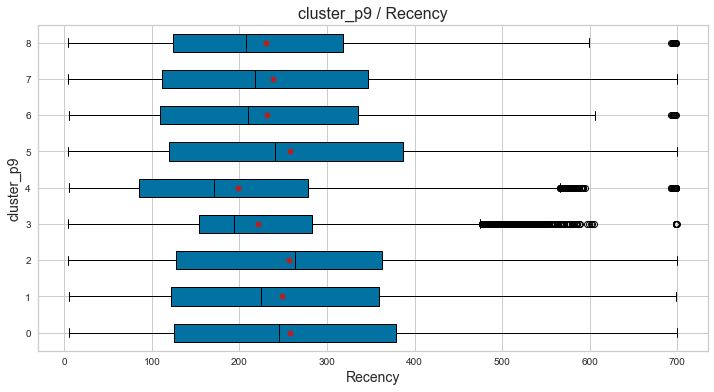

                   sum_sq       df           F         PR(>F)
C(catquali)  3.216693e+07      8.0  175.236236  4.440706e-295
Residual     2.086150e+09  90918.0         NaN            NaN


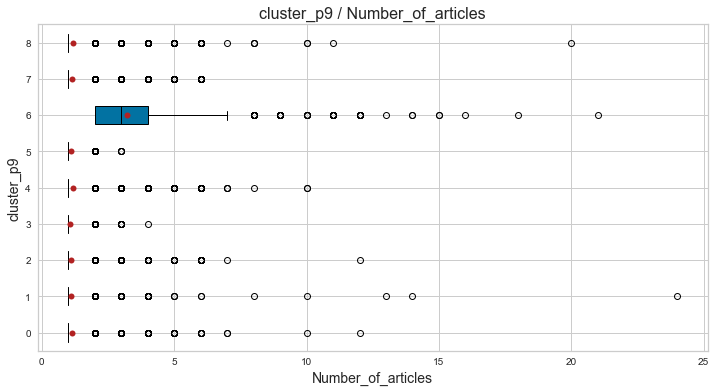

                   sum_sq       df            F  PR(>F)
C(catquali)  10554.877076      8.0  4933.754036     0.0
Residual     24312.833263  90918.0          NaN     NaN


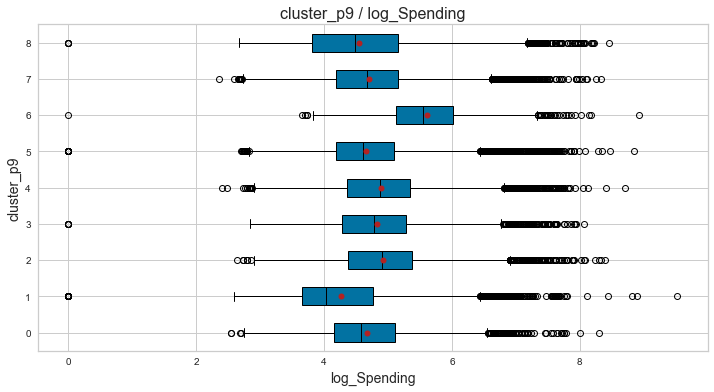

                   sum_sq       df           F  PR(>F)
C(catquali)   4412.909885      8.0  880.230946     0.0
Residual     56975.522006  90918.0         NaN     NaN


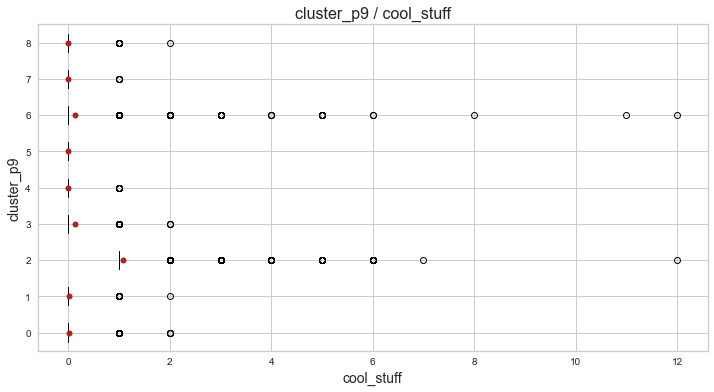

                   sum_sq       df             F  PR(>F)
C(catquali)  12265.810159      8.0  43077.167662     0.0
Residual      3236.003516  90918.0           NaN     NaN


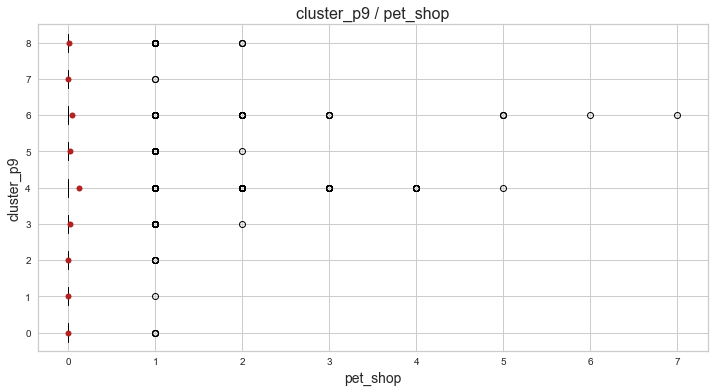

                  sum_sq       df          F  PR(>F)
C(catquali)   124.761931      8.0  581.81842     0.0
Residual     2436.994269  90918.0        NaN     NaN


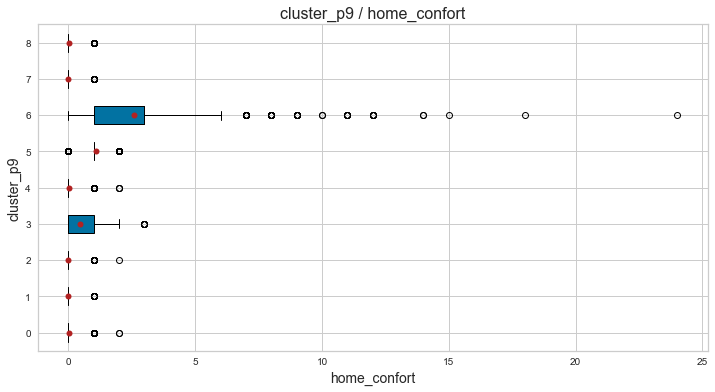

                   sum_sq       df             F  PR(>F)
C(catquali)  31396.506489      8.0  25524.744246     0.0
Residual     13979.119387  90918.0           NaN     NaN


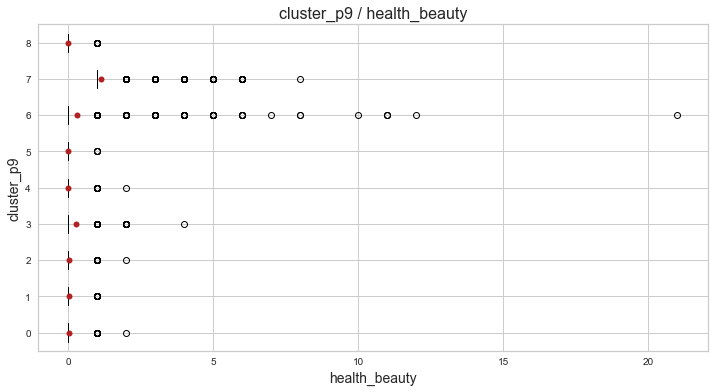

                   sum_sq       df             F  PR(>F)
C(catquali)  17815.165123      8.0  26532.112747     0.0
Residual      7630.937640  90918.0           NaN     NaN


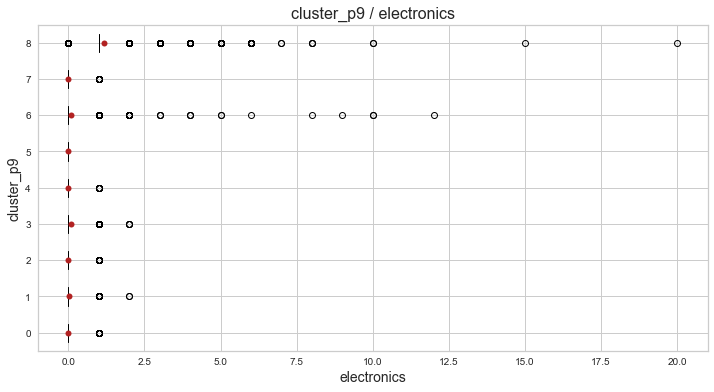

                   sum_sq       df             F  PR(>F)
C(catquali)  10304.265190      8.0  23144.556841     0.0
Residual      5059.738176  90918.0           NaN     NaN


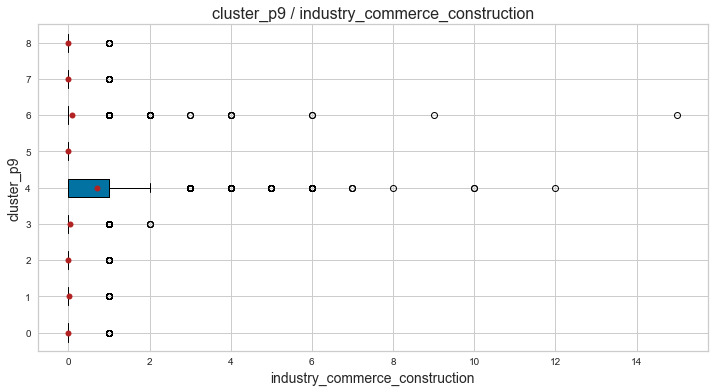

                  sum_sq       df            F  PR(>F)
C(catquali)  4330.346685      8.0  7067.581274     0.0
Residual     6963.246065  90918.0          NaN     NaN


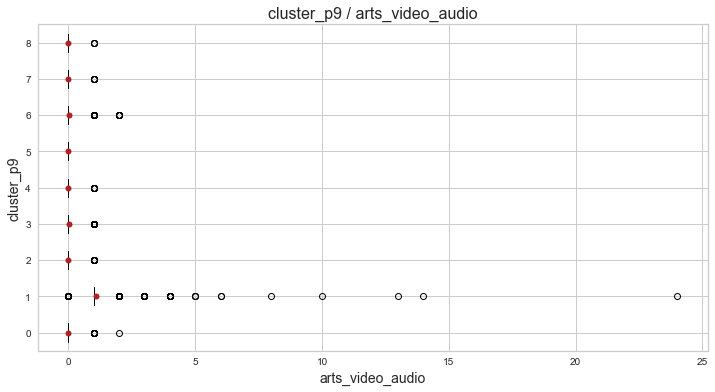

                  sum_sq       df             F  PR(>F)
C(catquali)  6737.292651      8.0  38197.766698     0.0
Residual     2004.505846  90918.0           NaN     NaN


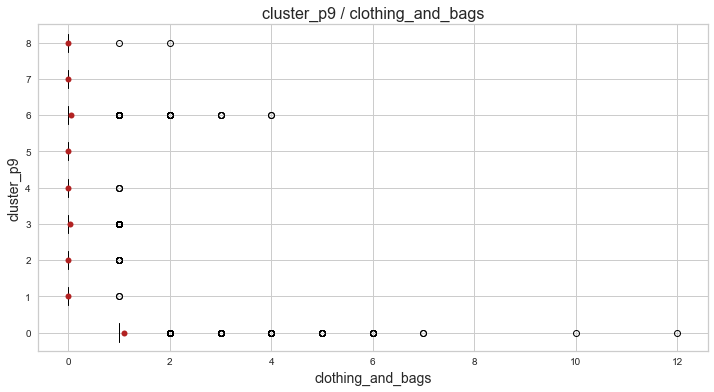

                  sum_sq       df             F  PR(>F)
C(catquali)  6556.387840      8.0  49227.522958     0.0
Residual     1513.618891  90918.0           NaN     NaN


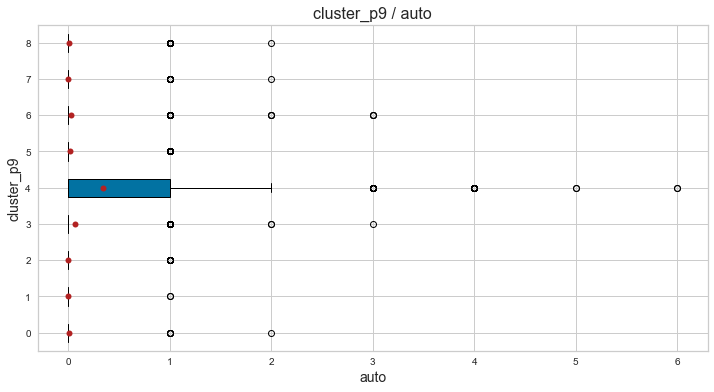

                  sum_sq       df           F  PR(>F)
C(catquali)   964.035701      8.0  2780.46206     0.0
Residual     3940.361167  90918.0         NaN     NaN


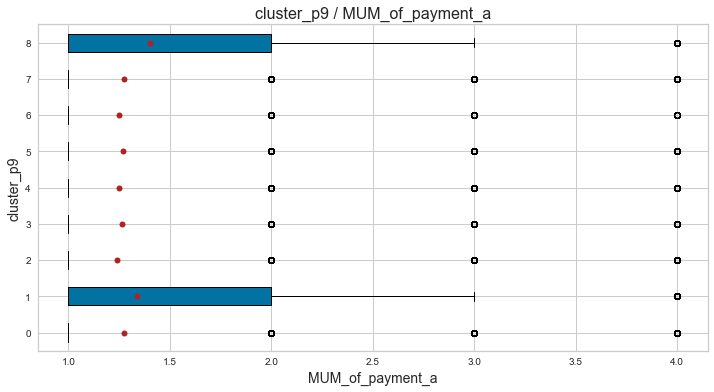

                   sum_sq       df          F         PR(>F)
C(catquali)    185.286772      8.0  70.405009  4.352550e-116
Residual     29908.920582  90918.0        NaN            NaN


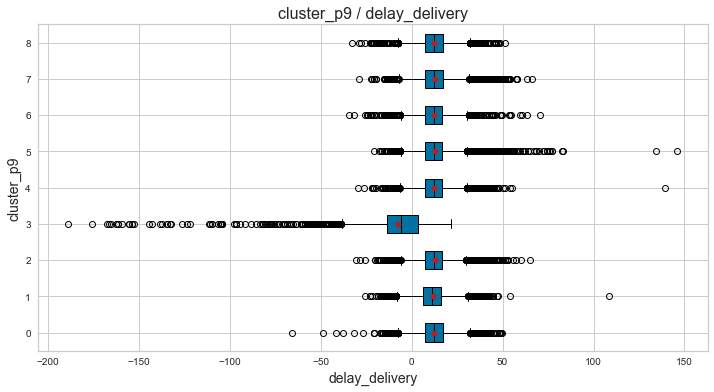

                   sum_sq       df            F  PR(>F)
C(catquali)  2.136125e+06      8.0  3382.014321     0.0
Residual     7.178126e+06  90918.0          NaN     NaN


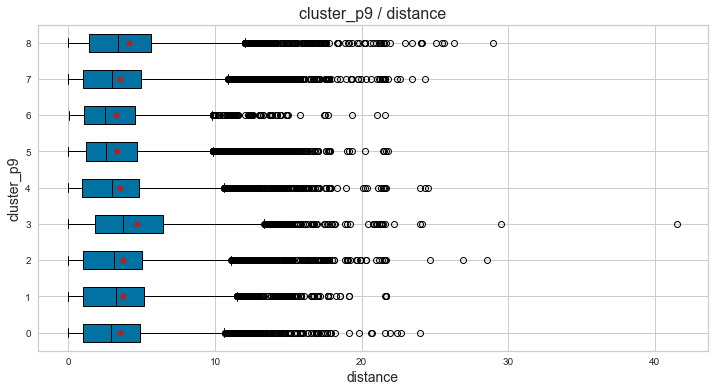

                    sum_sq       df           F         PR(>F)
C(catquali)   11655.905756      8.0  142.431452  3.835636e-239
Residual     930036.542319  90918.0         NaN            NaN


In [139]:
plotcat = list(X_full)

for i in range(17) :
    boxplots(X_full, 'cluster_p9', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

In [174]:
X_full['tot_customer_spending'] = dat['tot_customer_spending']

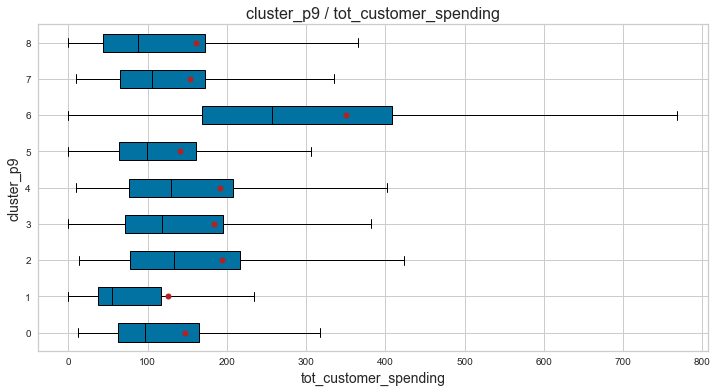

                   sum_sq       df           F  PR(>F)
C(catquali)  1.303651e+08      8.0  325.784067     0.0
Residual     4.547696e+09  90918.0         NaN     NaN


In [176]:
boxplots(X_full, 'cluster_p9', 'tot_customer_spending', tukey=0, size=(12,6), showfliers=False, sort = 1, font=12)

<a id='pca5' />

## Kmeans_PCA for 7 components (53%)

In [68]:
# We use a PCA to project the data over less dimensions --> decomposition from sklearn
pca = decomposition.PCA(n_components=7)
pca.fit(X_fNorm)
print(pca.explained_variance_ratio_.cumsum())
X_trans_5 = pca.transform(X_fNorm)

[0.11217923 0.18937626 0.26250795 0.33377928 0.40049328 0.465322
 0.5287667 ]


In [304]:
X_trans_5.shape

(90927, 7)

### Best number of clusters

In [146]:
# startt = time.time()

# inertia_pca5 = []

# K_range = range(2, 22)
# for k in K_range:
#     model = KMeans(n_clusters=k).fit(X_trans_5)
#     inertia_pca5.append(model.inertia_)
    
# endt = time.time()
# print("total time: ",(endt - startt),"sec")

total time:  58.07270002365112 sec


Text(0, 0.5, 'Cout du modèle (Inertia_ad)')

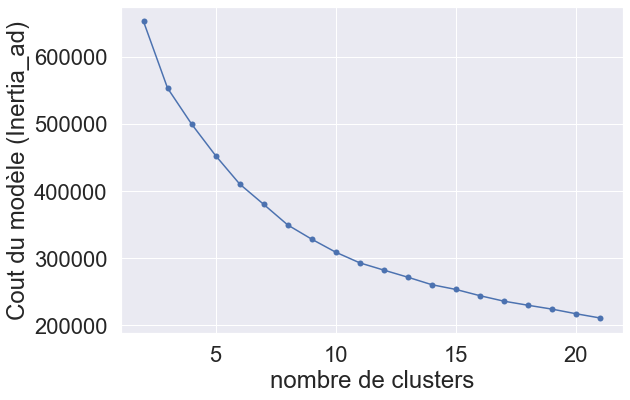

In [147]:
# plt.plot(K_range, inertia_pca5, 'o-')
# plt.xlabel('nombre de clusters')
# plt.ylabel('Cout du modèle (Inertia_ad)')

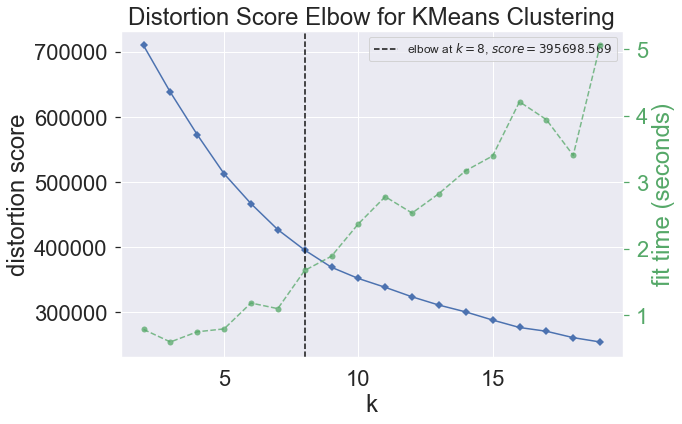

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [280]:
plt.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_trans_5)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [281]:
# Best number of clusters
startt = time.time()

silhouette_ad_p5 = []

K_range = range(5, 15)
for k in K_range:
    
    cls_ad_p5 = cluster.KMeans(n_clusters=k)
    cls_ad_p5.fit(X_trans_5)
    silh_ad_p5 = metrics.silhouette_score(X_trans_5, cls_ad_p5.labels_)
    silhouette_ad_p5.append(silh_ad_p5)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  922.0129418373108 sec


Text(0, 0.5, 'silhoutte')

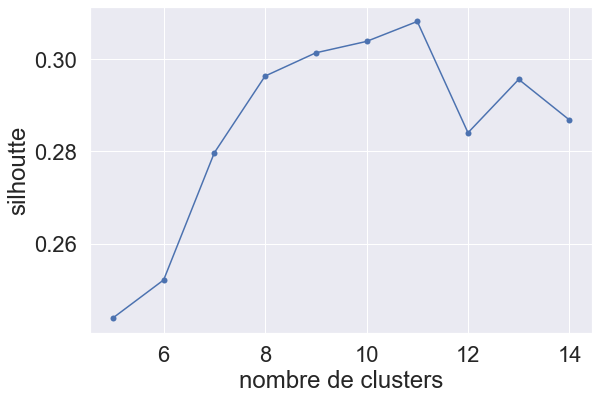

In [282]:
plt.plot(K_range, silhouette_ad_p5, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('silhoutte')

In [283]:
# Best number of clusters with davies
startt = time.time()

davies_ad_5p = []

K_range = range(3, 18)
for k in K_range:
    
    cls_ad_5p = cluster.KMeans(n_clusters=k)
    cls_ad_5p.fit(X_trans_5)
    dav_ad_5p = metrics.davies_bouldin_score(X_trans_5, cls_ad_5p.labels_)
    davies_ad_5p.append(dav_ad_5p)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  30.112788200378418 sec


Text(0, 0.5, 'davies_bouldin')

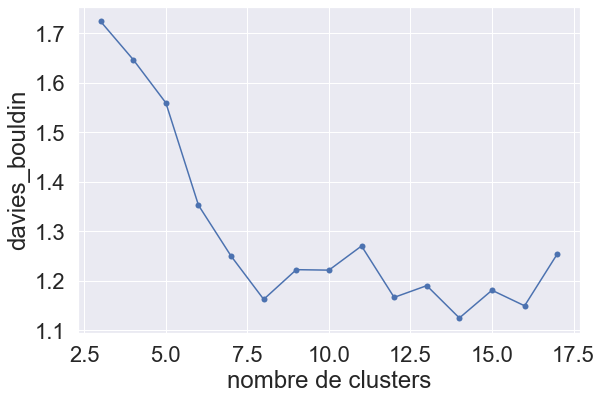

In [284]:
plt.plot(K_range, davies_ad_5p, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('davies_bouldin')

In [69]:
model_p5 = KMeans(n_clusters=9)
model_p5.fit(X_trans_5)
model_p5.labels_

X_full['cluster_p5'] = model_p5.labels_

In [316]:
X_full['cluster_p5'].value_counts()

1    21825
4    17129
2    12456
7    10179
6     9543
0     9434
8     6555
3     2091
5     1715
Name: cluster_p5, dtype: int64

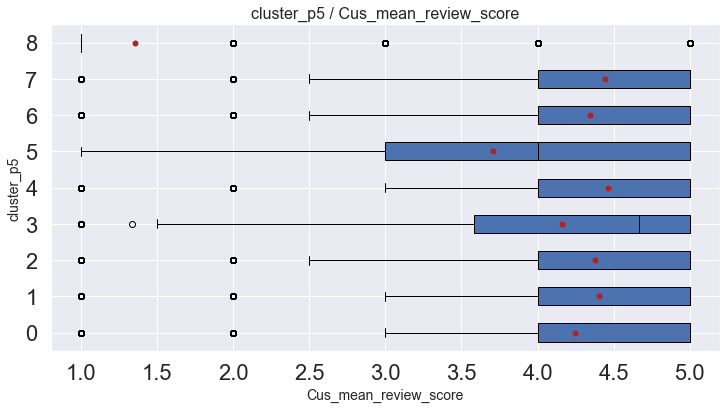

                   sum_sq       df           F  PR(>F)
C(catquali)  56669.944971      8.0  7003.69417     0.0
Residual     91957.150247  90918.0         NaN     NaN


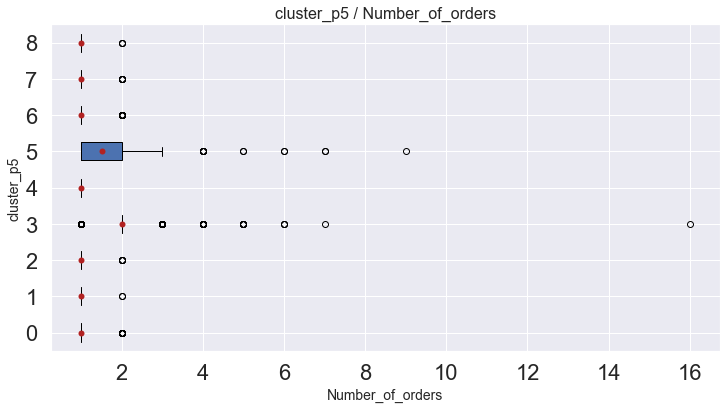

                  sum_sq       df             F  PR(>F)
C(catquali)  2463.691006      8.0  17578.728627     0.0
Residual     1592.790523  90918.0           NaN     NaN


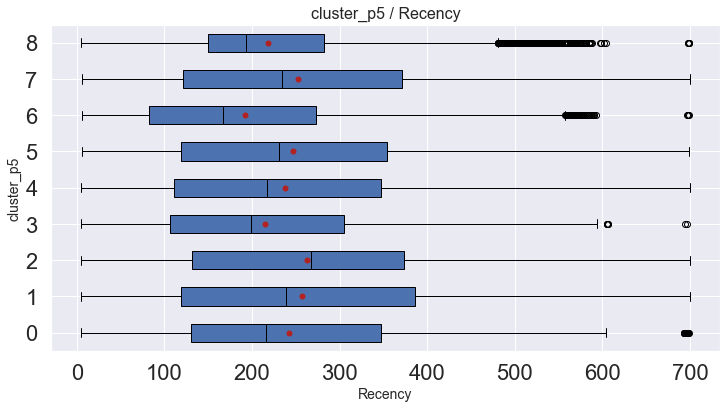

                   sum_sq       df           F  PR(>F)
C(catquali)  4.173184e+07      8.0  228.390269     0.0
Residual     2.076585e+09  90918.0         NaN     NaN


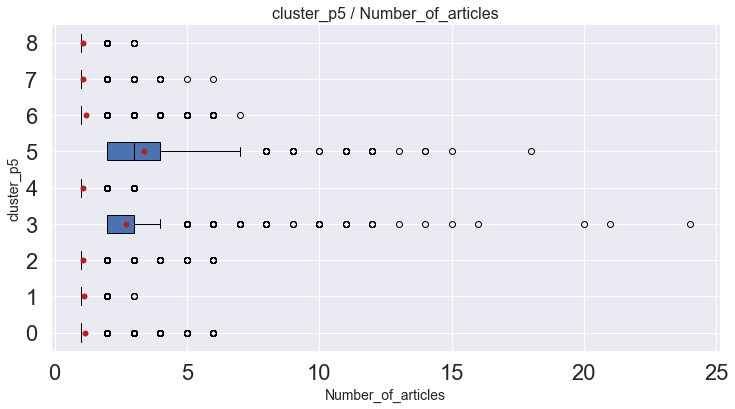

                   sum_sq       df            F  PR(>F)
C(catquali)  13780.452808      8.0  7426.826406     0.0
Residual     21087.257531  90918.0          NaN     NaN


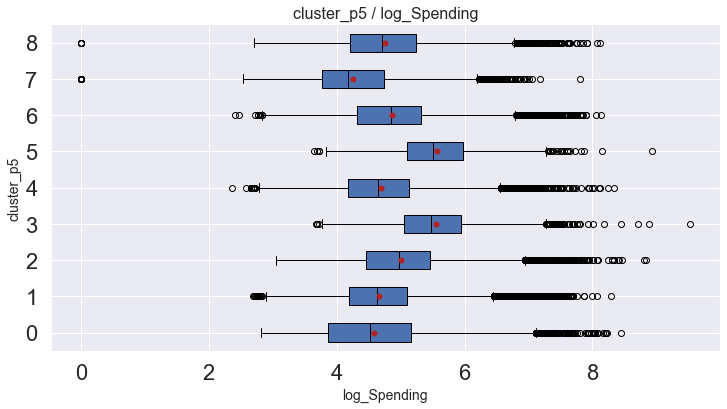

                   sum_sq       df            F  PR(>F)
C(catquali)   6370.538117      8.0  1315.927748     0.0
Residual     55017.893774  90918.0          NaN     NaN


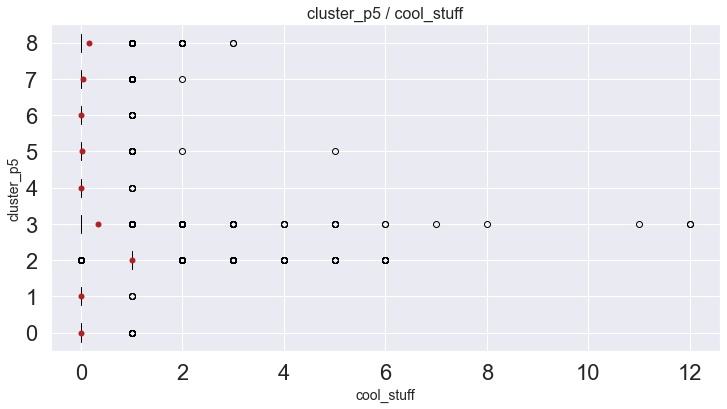

                   sum_sq       df             F  PR(>F)
C(catquali)  10637.967823      8.0  24856.430178     0.0
Residual      4863.845852  90918.0           NaN     NaN


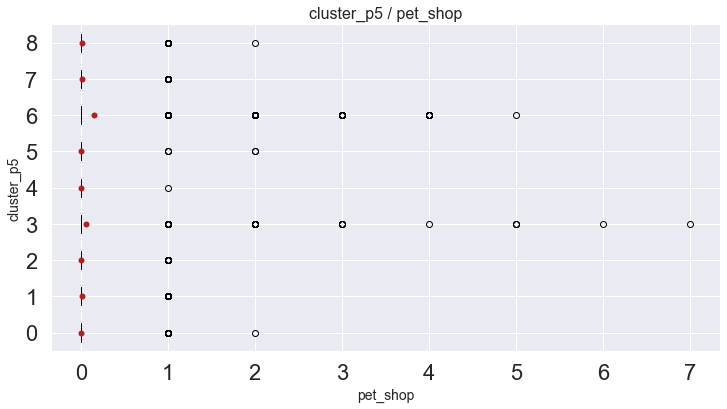

                  sum_sq       df           F  PR(>F)
C(catquali)   168.816934      8.0  801.759694     0.0
Residual     2392.939266  90918.0         NaN     NaN


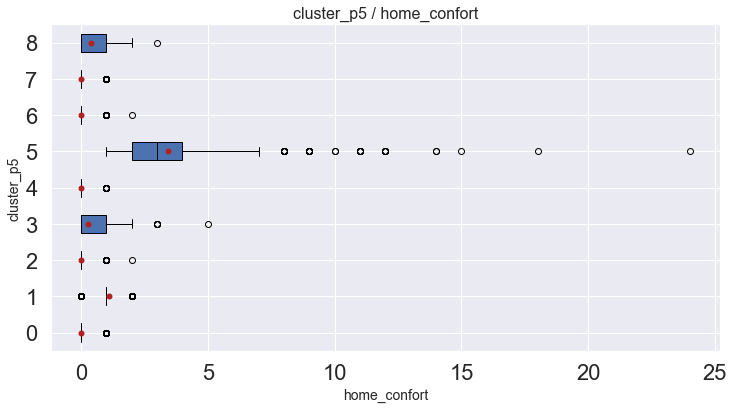

                   sum_sq       df             F  PR(>F)
C(catquali)  35068.045856      8.0  38664.708243     0.0
Residual     10307.580019  90918.0           NaN     NaN


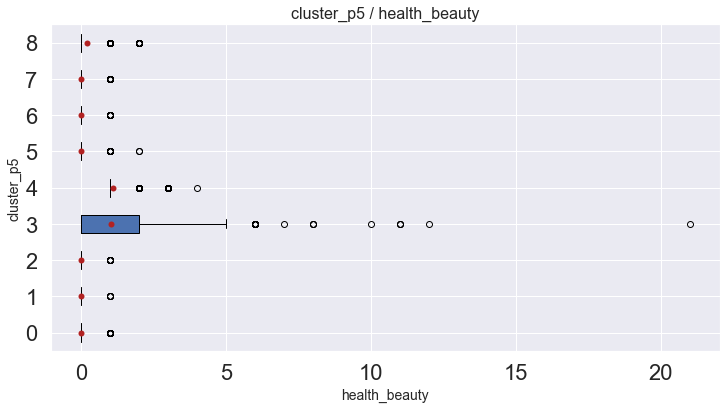

                   sum_sq       df             F  PR(>F)
C(catquali)  17325.972602      8.0  24249.038278     0.0
Residual      8120.130162  90918.0           NaN     NaN


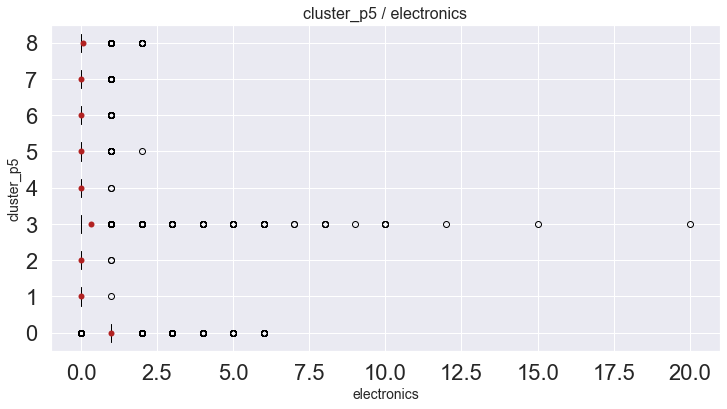

                  sum_sq       df             F  PR(>F)
C(catquali)  8230.854547      8.0  13113.648209     0.0
Residual     7133.148818  90918.0           NaN     NaN


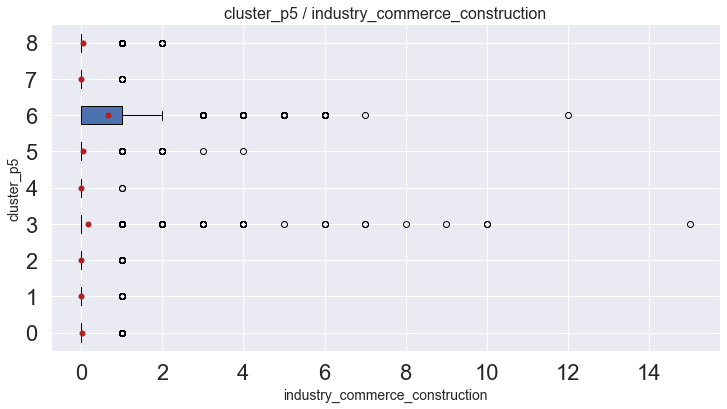

                  sum_sq       df            F  PR(>F)
C(catquali)  3852.570471      8.0  5884.070578     0.0
Residual     7441.022279  90918.0          NaN     NaN


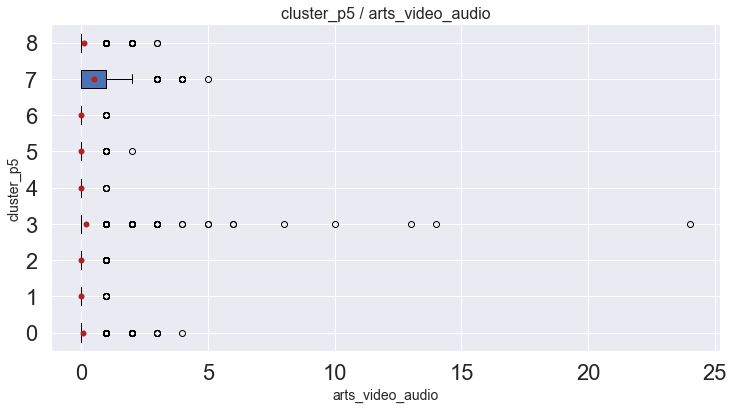

                  sum_sq       df            F  PR(>F)
C(catquali)  2146.648719      8.0  3699.101134     0.0
Residual     6595.149779  90918.0          NaN     NaN


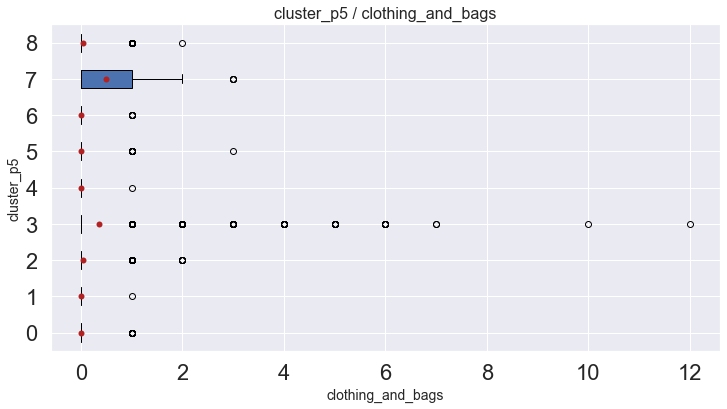

                  sum_sq       df            F  PR(>F)
C(catquali)  2281.614281      8.0  4479.650633     0.0
Residual     5788.392449  90918.0          NaN     NaN


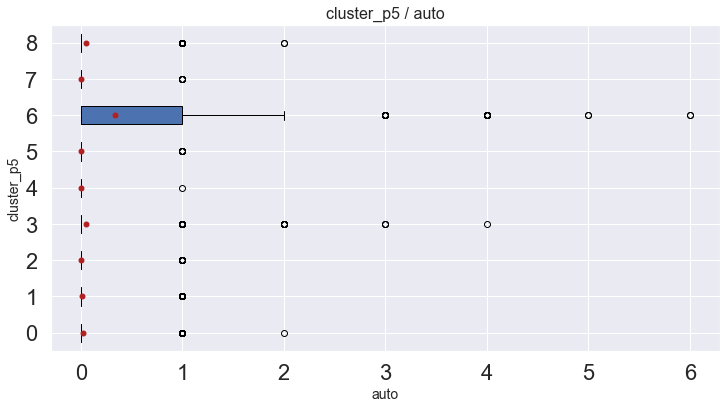

                  sum_sq       df            F  PR(>F)
C(catquali)   940.080051      8.0  2694.985103     0.0
Residual     3964.316816  90918.0          NaN     NaN


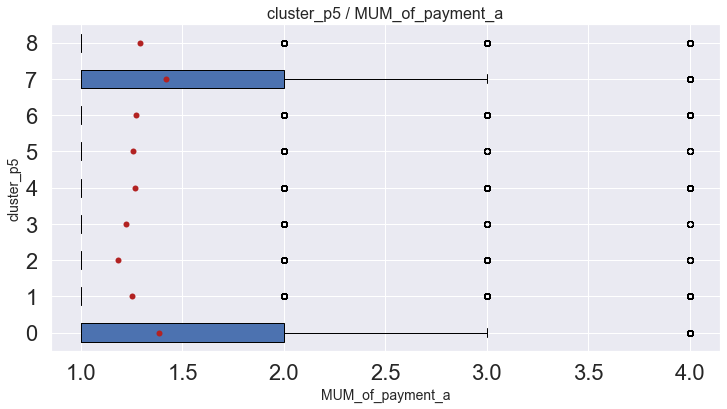

                   sum_sq       df           F         PR(>F)
C(catquali)    460.525979      8.0  176.615337  1.987340e-297
Residual     29633.681374  90918.0         NaN            NaN


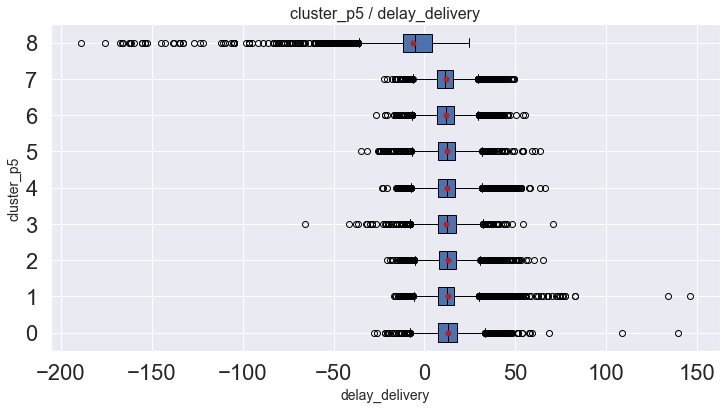

                   sum_sq       df            F  PR(>F)
C(catquali)  2.236899e+06      8.0  3591.992599     0.0
Residual     7.077352e+06  90918.0          NaN     NaN


                    sum_sq       df           F  PR(>F)
C(catquali)   39138.419720      8.0  492.821861     0.0
Residual     902554.028355  90918.0         NaN     NaN


In [317]:
plotcat = list(X_full)

for i in range(17) :
    boxplots(X_full, 'cluster_p5', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

In [318]:
clusters_uniq_5 = X_full['cluster_p5'].unique()
oneone = ['Cus_mean_review_score',  'Number_of_orders',  'Recency', 'Number_of_articles', 'log_Spending']
onecat = ['cool_stuff', 'pet_shop', 'home_confort', 'health_beauty', 'electronics', 'industry_commerce_construction',
          'arts_video_audio', 'clothing_and_bags', 'auto']
onemet = ['MUM_of_payment_a', 'delay_delivery', 'distance']

nb_clust_6 = 9 # change the color scale

Cluster_p5 = []
# selected = selected categories

for i in range(len(clusters_uniq_5)) :
    means_c5 = []
    Mean_cluster5 = X_full[X_full['cluster_p5'].isin([clusters_uniq_5[i]])]
    for y in range(len(selected_full)) :
        a = Mean_cluster5[selected_full[y]]
        means_c5.append(a.mean())
    means_c5.append(i)
    Cluster_p5.append(means_c5)

col_names = selected_full.copy()
col_names.append('cluster')

df = pd.DataFrame(Cluster_p5, columns = col_names)

fig = px.parallel_coordinates(df, color='cluster', labels={"Cus_mean_review_score" : "Mean review score",
                                                           "Number_of_orders": "Number of orders",
                                                           "Recency" : "Last order in days", 
                                                           "Number_of_articles": "Total bought articles",
                                                           "log_Spending": "Total spending (log)"},
                              title = 'Mean values of the clusters',
                              dimensions = oneone,
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_scale=('red', 'blue', 'green', 'red', 'blue', 'green'),
                              #color_continuous_midpoint=2)
                              range_color = (1,nb_clust_6)
                             )
fig.show()

fig = px.parallel_coordinates(df, color='cluster', labels={"industry_commerce_construction" : "commerce",
                                                           "Number_of_orders": "Number of orders",
                                                           "Recency" : "Last order in days", 
                                                           "Number_of_articles": "Total bought articles",
                                                           "log_Spending": "Total spending (log)"},
                              title = 'Mean values of the clusters',
                              dimensions = onecat,
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_scale=('red', 'blue', 'green', 'red', 'blue', 'green'),
                              #color_continuous_midpoint=2)
                              range_color = (1,nb_clust_6)
                             )
fig.show()

fig = px.parallel_coordinates(df, color='cluster', labels={"Cus_mean_review_score" : "Mean review score",
                                                           "Number_of_orders": "Number of orders",
                                                           "Recency" : "Last order in days", 
                                                           "Number_of_articles": "Total bought articles",
                                                           "log_Spending": "Total spending (log)"},
                              title = 'Mean values of the clusters',
                              dimensions = onemet,
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_scale=('red', 'blue', 'green', 'red', 'blue', 'green'),
                              #color_continuous_midpoint=2)
                              range_color = (1,nb_clust_6)
                             )
fig.show()

In [157]:
# sample of X_trans_5
# number_of_rows = X_trans_5.shape[0]
# prcent = 10
# random_indices = np.random.choice(number_of_rows, size=ceil(number_of_rows*prcent/100), replace=False)

# nulm = X_trans_5[random_indices, :]

In [158]:
# import numpy as np
# import matplotlib.pyplot as plt

# from matplotlib.ticker import NullFormatter
# from sklearn import manifold, datasets
# from time import time

# n_components = 2
# perplexities = [5, 50, 150, 500]
# (fig, subplots) = plt.subplots(1, 5, figsize=(15, 3))

# #ax = subplots[1][0]
# ax = subplots[0]
# ax.scatter(X_trans_5[:, 0], X_trans_5[:, 2], c=X_full['cluster_p5'])
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())

# for i, perplexity in enumerate(perplexities):
#     #ax = subplots[1][i + 1]
#     ax = subplots[i + 1]
#     #ax = plt.subplots(1, i+1)

#     t0 = time()
#     tsne = manifold.TSNE(
#         n_components=n_components, init="random", random_state=0, perplexity=perplexity
#     )
#     Y = tsne.fit_transform(X_trans_5)
#     t1 = time()
#     print("Dataframe, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

#     ax.set_title("Perplexity=%d" % perplexity)
#     ax.scatter(Y[:, 0], Y[:, 1], c=color)
#     ax.xaxis.set_major_formatter(NullFormatter())
#     ax.yaxis.set_major_formatter(NullFormatter())
#     ax.axis("tight")

In [70]:
polarplt(X_full, 'cluster_p5', selected_full)

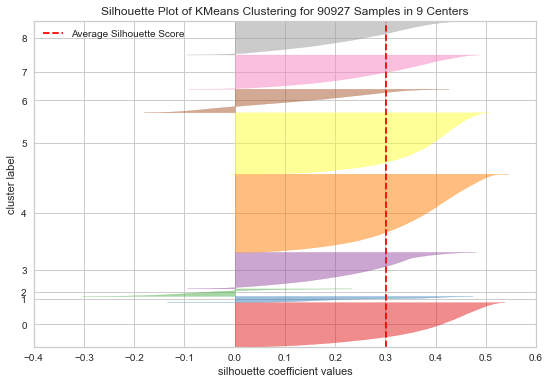

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 90927 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [168]:
# Instantiate the clustering model and visualizer 
model9 = KMeans(9)
visualizer9 = SilhouetteVisualizer(model9)

visualizer9.fit(X_trans_5)    # Fit the data to the visualizer
visualizer9.poof()

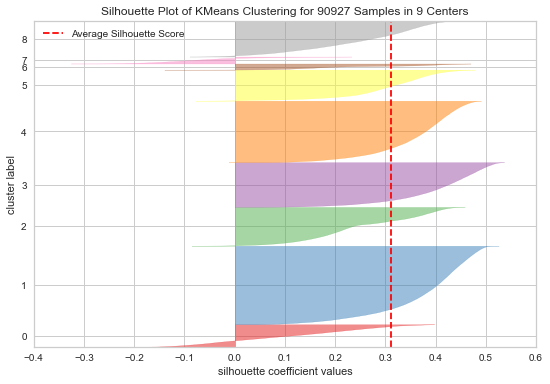

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 90927 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [170]:
# Instantiate the clustering model and visualizer 
model9 = KMeans(9)
visualizer9 = SilhouetteVisualizer(model9)

visualizer9.fit(X_trans_8)    # Fit the data to the visualizer
visualizer9.poof()

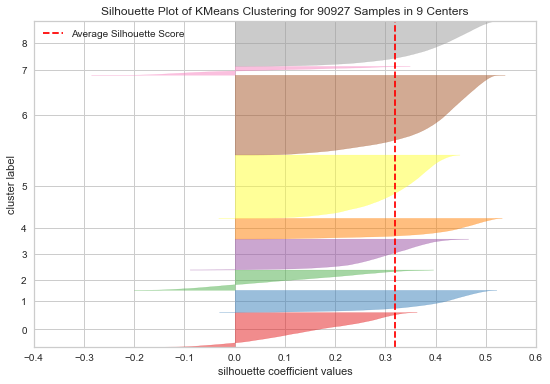

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 90927 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [171]:
# Instantiate the clustering model and visualizer 
model9 = KMeans(9)
visualizer9 = SilhouetteVisualizer(model9)

visualizer9.fit(X_trans_9)    # Fit the data to the visualizer
visualizer9.poof()

## Sample t-nse

In [25]:
prcent = 10
X_reduc_full = X_full.copy().sample( # sample of the data (n), faster results
                                     n=ceil(X_full.shape[0]*prcent/100),
                                     random_state=42)

# Reloading after restart

In [26]:
X_rfNorm = std_scale.fit_transform(X_reduc_full)
# Reloading after restart

In [161]:
# We use a PCA to project the data over less dimensions --> decomposition from sklearn
pca = decomposition.PCA(n_components=5)
pca.fit(X_rfNorm)
print(pca.explained_variance_ratio_.cumsum())
X_trans_r5 = pca.transform(X_rfNorm)

[0.1083703  0.21266625 0.30076495 0.38038904 0.44283144]


In [162]:
model_pr5 = KMeans(n_clusters=9)
model_pr5.fit(X_trans_r5)
model_pr5.labels_

X_reduc_full['cluster_p5'] = model_pr5.labels_

Dataframe, perplexity=5 in 19 sec
Dataframe, perplexity=50 in 29 sec
Dataframe, perplexity=150 in 55 sec
Dataframe, perplexity=500 in 1.4e+02 sec


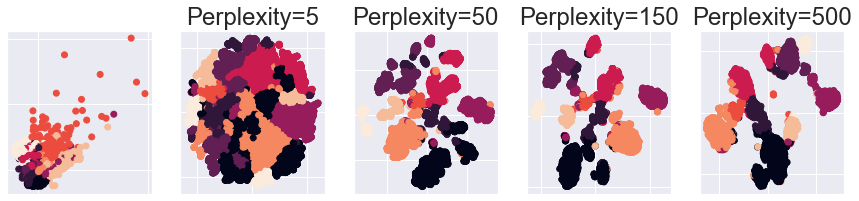

In [163]:
n_components = 2
perplexities = [5, 50, 150, 500]
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 3))

#ax = subplots[1][0]
ax = subplots[0]
ax.scatter(X_trans_r5[:, 0], X_trans_r5[:, 2], c=X_reduc_full['cluster_p5'])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    #ax = subplots[1][i + 1]
    ax = subplots[i + 1]
    #ax = plt.subplots(1, i+1)

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components, init="random", random_state=0, perplexity=perplexity
    )
    Y = tsne.fit_transform(X_trans_r5)
    t1 = time()
    print("Dataframe, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=X_reduc_full['cluster_p5'])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")